In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob
from typing import List
import scipy

#### Lendo o arquivo

In [7]:
file = glob.glob('*v2.csv')
df = pd.read_csv(file[0])

#### Explorando os dados

In [8]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Nenhum valor nulo. 

#### Floor: Object --> Int64

*floor* está definido como *Object*. Isso se deve ao fato de que, quando o andar do imóvel é o térro, esse dado é representado pela *string* "-".
Como se trata de um número discreto, vamos fazer o *casting*.


In [10]:
df = df.assign(floor = lambda x: x['floor'].str.replace('-', '0')\
          .astype('int64')).copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


#### Renomear colunas, substituindo espaços e parênteses por *underscore*. Remover eventuais espaços leading and trailing.

In [12]:
rename_dict = {c : c.replace(' (R$)', "").replace(" ", "_", 1).strip() for c in df.columns}
df.rename(columns=rename_dict, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking_spaces  10692 non-null  int64 
 5   floor           10692 non-null  int64 
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent_amount     10692 non-null  int64 
 10  property_tax    10692 non-null  int64 
 11  fire_insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


#### Remover espaços antes e depois dos dados das colunas *Object*.

In [14]:
def get_object_coluns(df) -> np.ndarray:
    """Get all columns whose dtype is Object from a pandas DataFrame

    Args:
        df (pd.DataFrame): Input pandas DataFrame to get object columns from.
    
    Returns:
        np.ndarray
    """
    return df.dtypes[df.dtypes == 'object'].index.values
    
    

In [15]:
def trim_object_columns(df: pd.DataFrame, column_names: np.ndarray|List[str]) -> pd.DataFrame:
    """Removes trim spaces from object type columns

    Args:
        df (pd.DataFrame): Pandas DataFrame.
        column_names (np.ndarray|List[str]): columns to be trimmed.

    Returns
    """
    for column in column_names:
        df[column] = df[column].str.strip().copy()

    return df
    

In [16]:
columns_object_type = get_object_coluns(df)
df = trim_object_columns(df, columns_object_type)

#### Verificando registros duplicados

Como não temos uma chave primária definida (nem mesmo uma surrogate key), vamos definir uma seguindo o critério abaixo:

Combinação dos valores de todas as colunas (chave primária composta). 

Caso haja dois ou mais registros cujos valores de todas as colunas sejam coincidentes, consideraremos como um registro duplicado.

In [17]:
summary_duplicated = pd.DataFrame([
        len(df) - np.sum(df.duplicated()),
        np.sum(df.duplicated())
], index=['unique', 'duplicated'], columns=['value'])

In [18]:
summary_duplicated

,value
unique,10334
duplicated,358


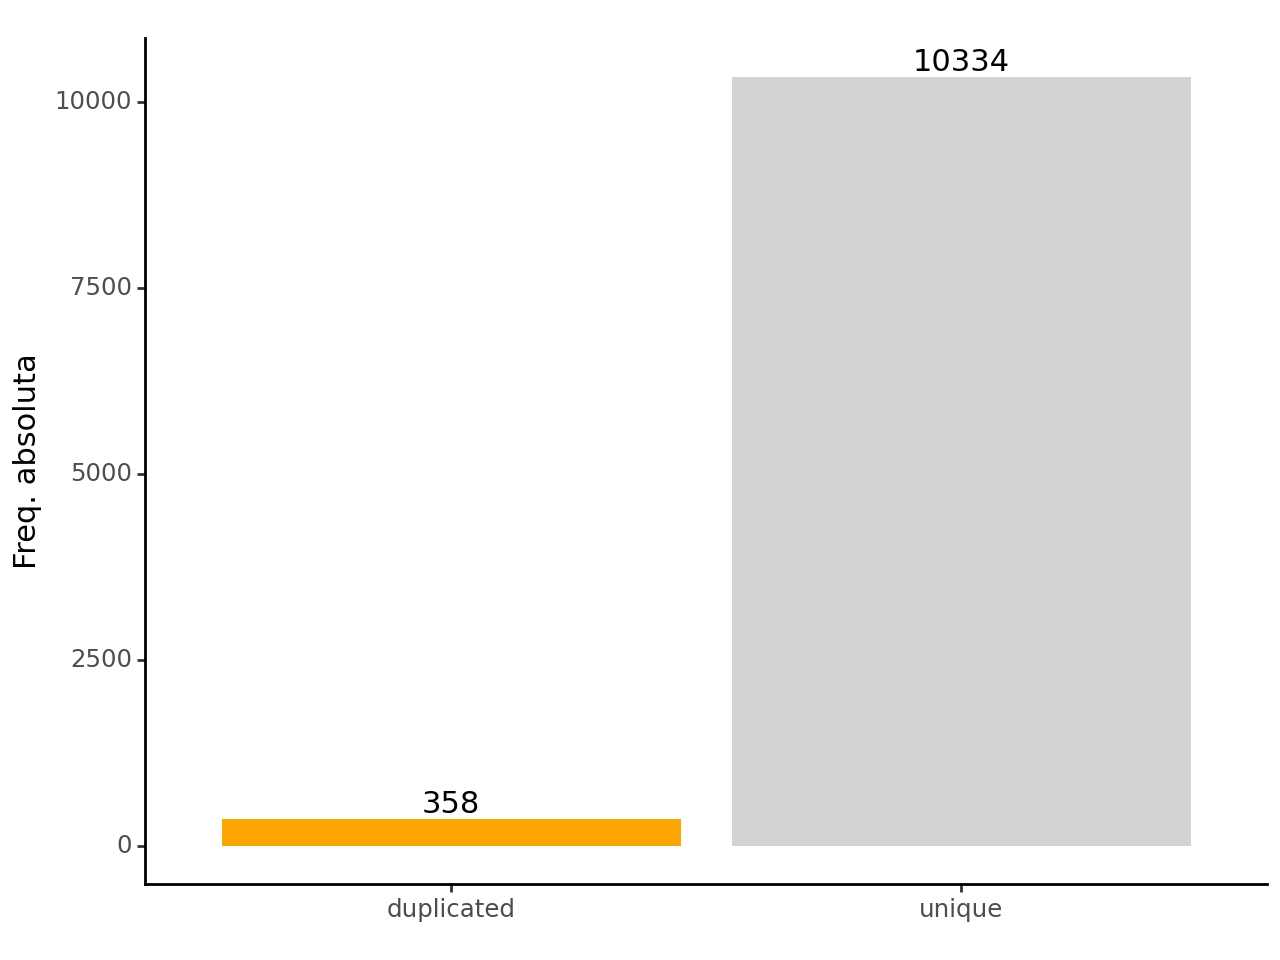

In [19]:
g=(
    ggplot(data=summary_duplicated)
    +geom_bar(
        stat='identity',
        mapping=aes(x=summary_duplicated.index,
           y=summary_duplicated['value']),
        fill=['orange', 'lightgrey']
    )
    +geom_text(data=summary_duplicated,
              mapping=aes(label='value', y='value', x=summary_duplicated.index), 
               stat='identity',
               va='bottom',
              )
    
    +labs(
        y='Freq. absoluta'
    )
    +theme_classic()
)

print(g)

#### Remover duplicados

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.describe()

,area,rooms,bathroom,parking_spaces,floor,hoa,rent_amount,property_tax,fire_insurance,total
count,10334.000000,10334.000000,10334.000000,10334.000000,10334.000000,1.033400e+04,10334.000000,10334.000000,10334.000000,1.033400e+04
mean,152.439423,2.539965,2.268725,1.644475,5.100929,1.091244e+03,3966.296013,376.929263,54.264273,5.488943e+03
std,545.875595,1.168185,1.414650,1.598527,6.067906,1.144609e+04,3436.190007,3160.602165,48.164380,1.266911e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,59.000000,2.000000,1.000000,1.000000,1.000000,1.800000e+02,1598.250000,41.000000,21.000000,2.116000e+03
50%,95.000000,3.000000,2.000000,1.000000,3.000000,5.710000e+02,2750.000000,130.000000,37.000000,3.685500e+03
75%,190.000000,3.000000,3.000000,2.000000,8.000000,1.286750e+03,5000.000000,389.750000,70.000000,6.912000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


#### Dados estranhos da tabela acima:

- Entender melhor a area 46335 $m^2$ de area parece estranho.
- A taxa de condominio (hoa_R\\$) $1.117 \times 10^6$ é mais alta que o alguel?
- O andar com valor 301 também não faz sentido.
- IPTU no valor de R\\$ 313.700.

Para entender melhor, vamos explorar com gráficos.

#### Entendendo melhor a área de 46.335 $m^2$

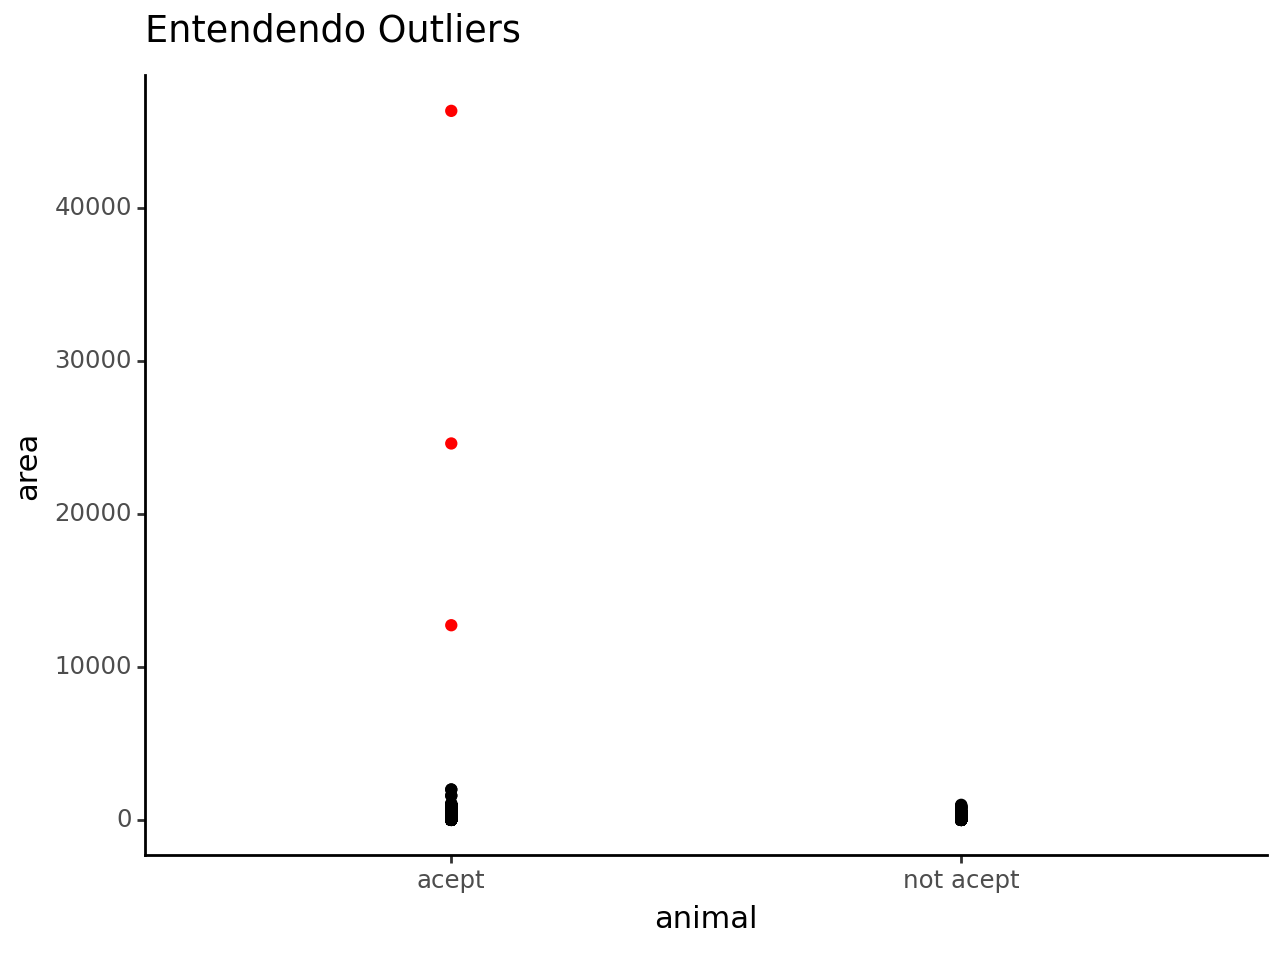

In [22]:
g=(
    ggplot(data=df)
    +geom_point(
        aes(x='animal', y='area'),
        fill=np.where(df.area > 10000, 'red', 'black'),
        color=np.where(df.area > 10000, 'red', 'black')
    )
    +theme_classic()
    +labs(
        title='Entendendo Outliers'
    )
)
print(g)

In [23]:
df.loc[df['area'] > 10000]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


#### Observações discrepantes

##### Area 46335 $m^2$

Acima, podemos notas que a área de 46.335 $m^2$ se refere à uma propriedade em Belo Horizonte. A priori, poderíamos interpretá-la como uma propriedade rural ou algo do gênero. Contudo, existe um dado de que tal propriedade está no andar 11.

##### Area 24.606 $m^2$

Em São Paulo, há um imóvel com área de 24.606 $mˆ2$. Aqui o caso é igual ao de Belo Horizonte. Além disso, o valor do IPTU (property_tax_R\\$) é bem acima quando comparado com os outros dois casos.

##### Área 12.732 $m^2$.

Aqui o imóvel está localizado em Campinas, interior do estado de São Paulo. Igualmente discrepante. Basicamente possui a metade da área da propriedade de São Paulo, mas com custo total igual 1/9 do valor daquela cidade. As principais diferenças ocorrem por conta dos valores do aluguel e IPTU, que são significativamente mais baratas que naquela cidade. Porém, tal diferença necessita ser checada na fonte dos dados.


#### Explorando a distribuição das áreas das propriedades, desconsiderando os *outliers* detectados acima.

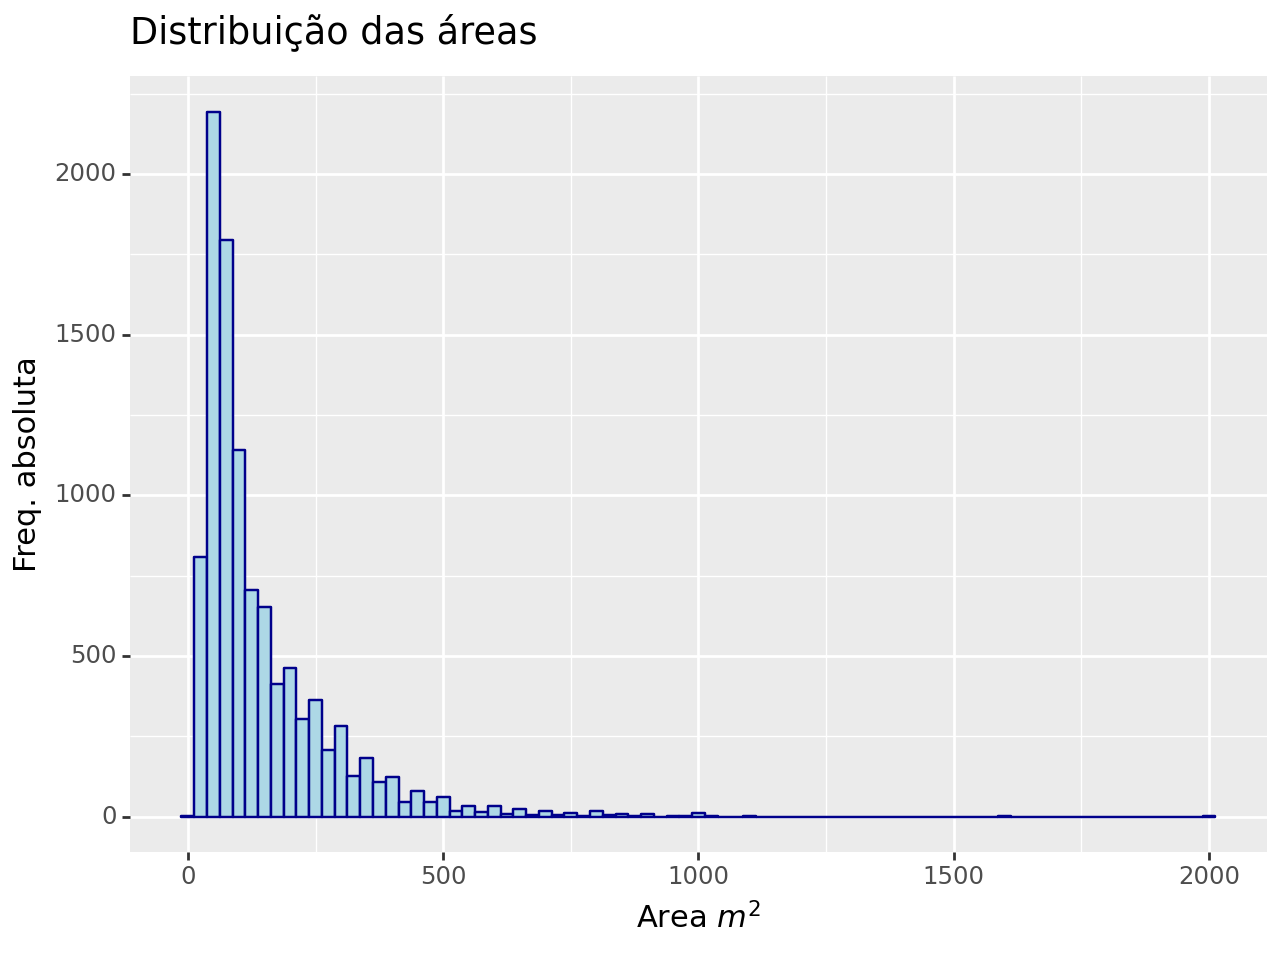

In [24]:
# Removendo outliers de area
df.query("area < 10000", inplace=True)

g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='area'),
        binwidth=25,
        color='darkblue',
        fill='lightblue'
    )
    +labs(
        y='Freq. absoluta',
        x='Area $m^2$',
        title='Distribuição das áreas',
    )
)
print(g)

#### Explorando a taxa de condomínio discrepante: R\\$ 1.117 $\times 10^6$

Nesse caso, estamos falando uma taxa de condomínio de mais de 1 milhão de reais. Não faz muito sentido. Se considerarmos o valor das demais *features*, como por exemplo, número de vagas de garagem, podemos supor que não faz sentido um apartamento de 155 $m^2$ sem vaga de garagem e a um preço tão alto de condomínio. 

Podemos faz algumas suposições baseadas em erro no valor: 

1. O valor corresponde, na verdade, ao valor de venda e foi erroneamente imputado ao valor do condomínio;
2. O valor foi erroneamente multiplicado por 1000. O condomínio seria no valor de R$ 1.117,00 mensais. 

In [25]:
df.loc[df['hoa'] == df['hoa'].max()]

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


#### Verificando os valores de condomínio

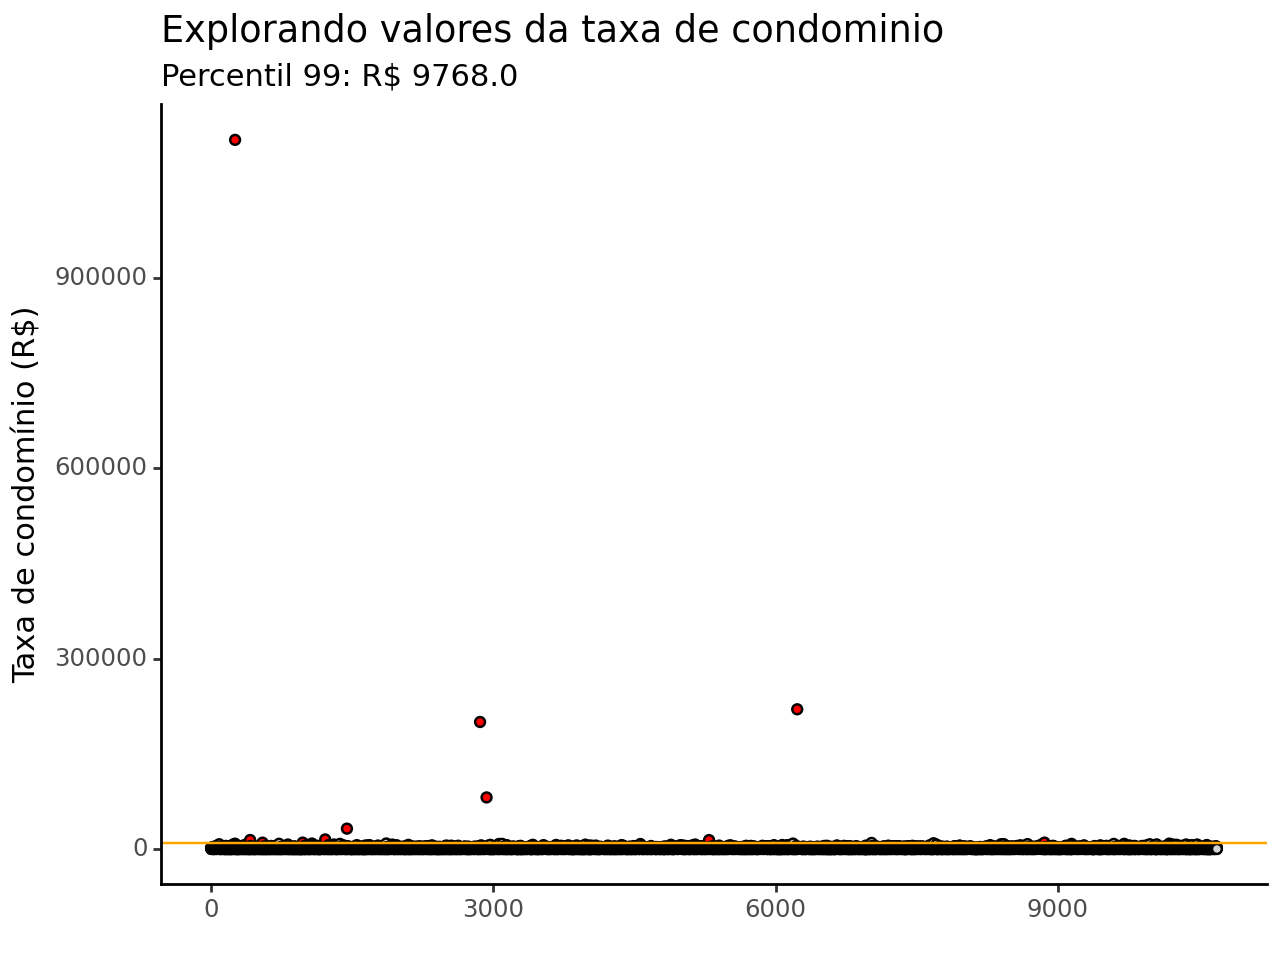

In [26]:
g=(
    ggplot(data=df)
    +geom_point(
        aes(x=df.index, y='hoa'),
        fill=['red' if dp > np.quantile(df['hoa'], .999) else 'lightgrey' for dp in df['hoa']]
    )
    +geom_hline(yintercept=np.quantile(df['hoa'], .999), color='orange')
    +theme_classic()
    +labs(
        title='Explorando valores da taxa de condominio',
        subtitle=f'Percentil 99: R$ {round(np.quantile(df["hoa"], .999), 2)}',
        y='Taxa de condomínio (R$)'
    )
)
print(g)

#### Examinando taxas de condomínio acima do percentil 99

In [27]:
percentile_99 = np.quantile(df['hoa'], .999)
df.query("hoa > @percentile_99").sort_values("hoa", ascending=False)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
1213,São Paulo,850,6,7,4,0,not acept,not furnished,15000,13000,2465,196,30660
415,São Paulo,488,4,3,3,0,acept,not furnished,14130,6400,1214,82,21820
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0,51,18050
974,São Paulo,600,6,7,4,0,acept,furnished,10000,15000,84,226,25310
8858,São Paulo,800,4,7,8,0,not acept,not furnished,10000,8500,209,128,18840


Os registros de índices 255, 6230, 2859, 2928, 1444 apresentam, respectivamente:

1. Taxa de condomínio de mais de 1 milhão de reais;
2. Taxa de condomínio de mais de 200 mil de reais;
3. Taxa de condomínio de 200 mil de reais;
4. Taxa de condomínio desproporcional ao padrão do imóvel;
5. Taxa de condomínio desproporcional ao padrão do imóvel.

**A sugestão para tratamento desses dados é de removê-los**.

In [28]:
indexes_to_remove = df.query("hoa > @percentile_99").sort_values("hoa", ascending=False).index.values
df = df[~df.index.isin(indexes_to_remove)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10320 non-null  object
 1   area            10320 non-null  int64 
 2   rooms           10320 non-null  int64 
 3   bathroom        10320 non-null  int64 
 4   parking_spaces  10320 non-null  int64 
 5   floor           10320 non-null  int64 
 6   animal          10320 non-null  object
 7   furniture       10320 non-null  object
 8   hoa             10320 non-null  int64 
 9   rent_amount     10320 non-null  int64 
 10  property_tax    10320 non-null  int64 
 11  fire_insurance  10320 non-null  int64 
 12  total           10320 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


#### Verificando novamente os dados de taxa de condominio, removidos os casos acima.

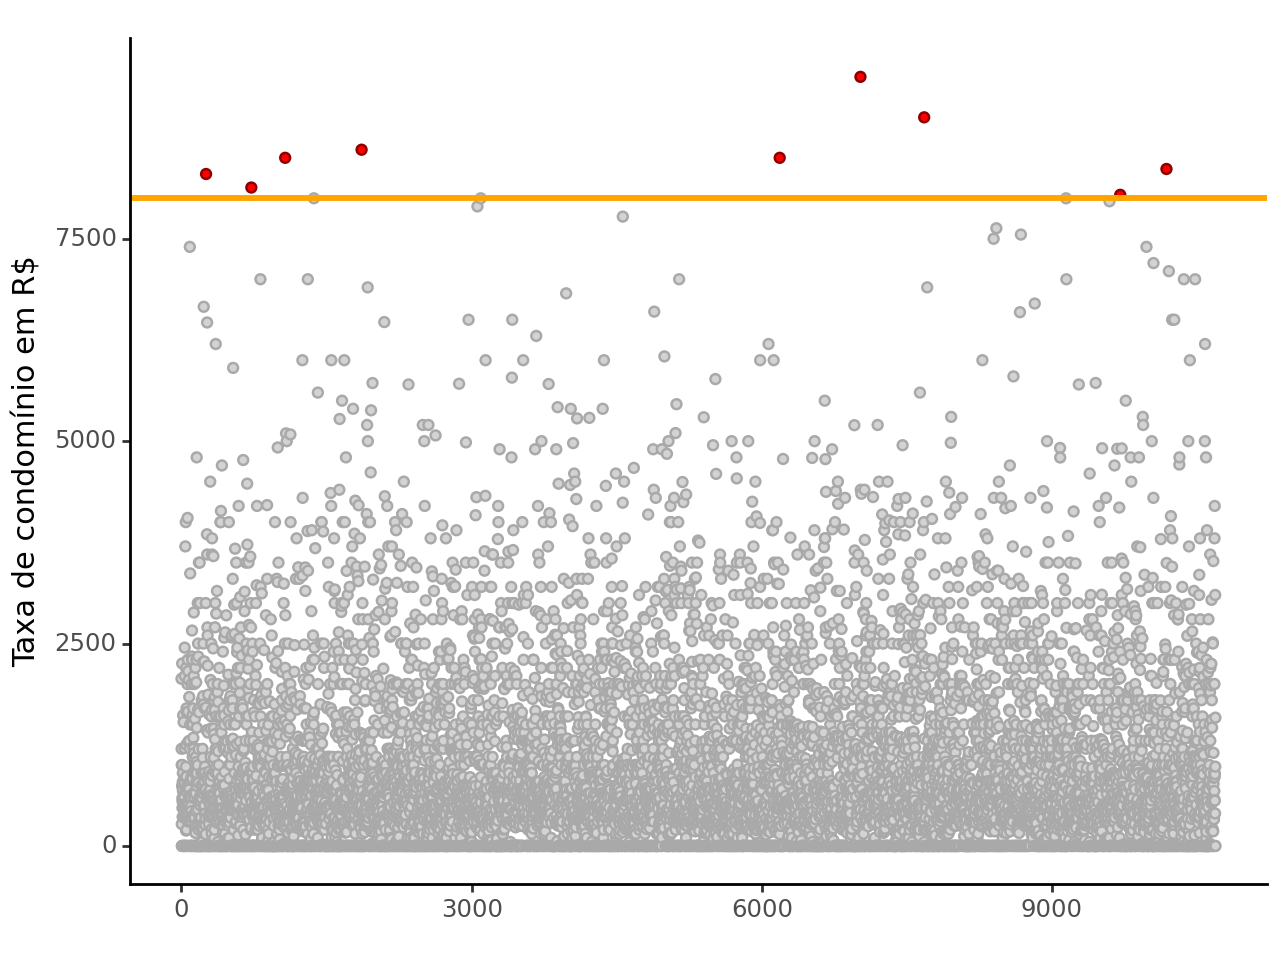

In [29]:
g=(
    ggplot(data=df)
    +geom_point(
        aes(x=df.index, y='hoa'),
        fill=['red' if dp > np.quantile(df['hoa'], .999) else 'lightgrey' for dp in df['hoa']],
        color=['darkred' if dp > np.quantile(df['hoa'], .999) else 'darkgrey' for dp in df['hoa']],
    )
    +geom_hline(yintercept=np.quantile(df['hoa'], .999), 
                color='orange',
               size=1.2)
    +theme_classic()
    +labs(
        y='Taxa de condomínio em R$'
    )
)
print(g)

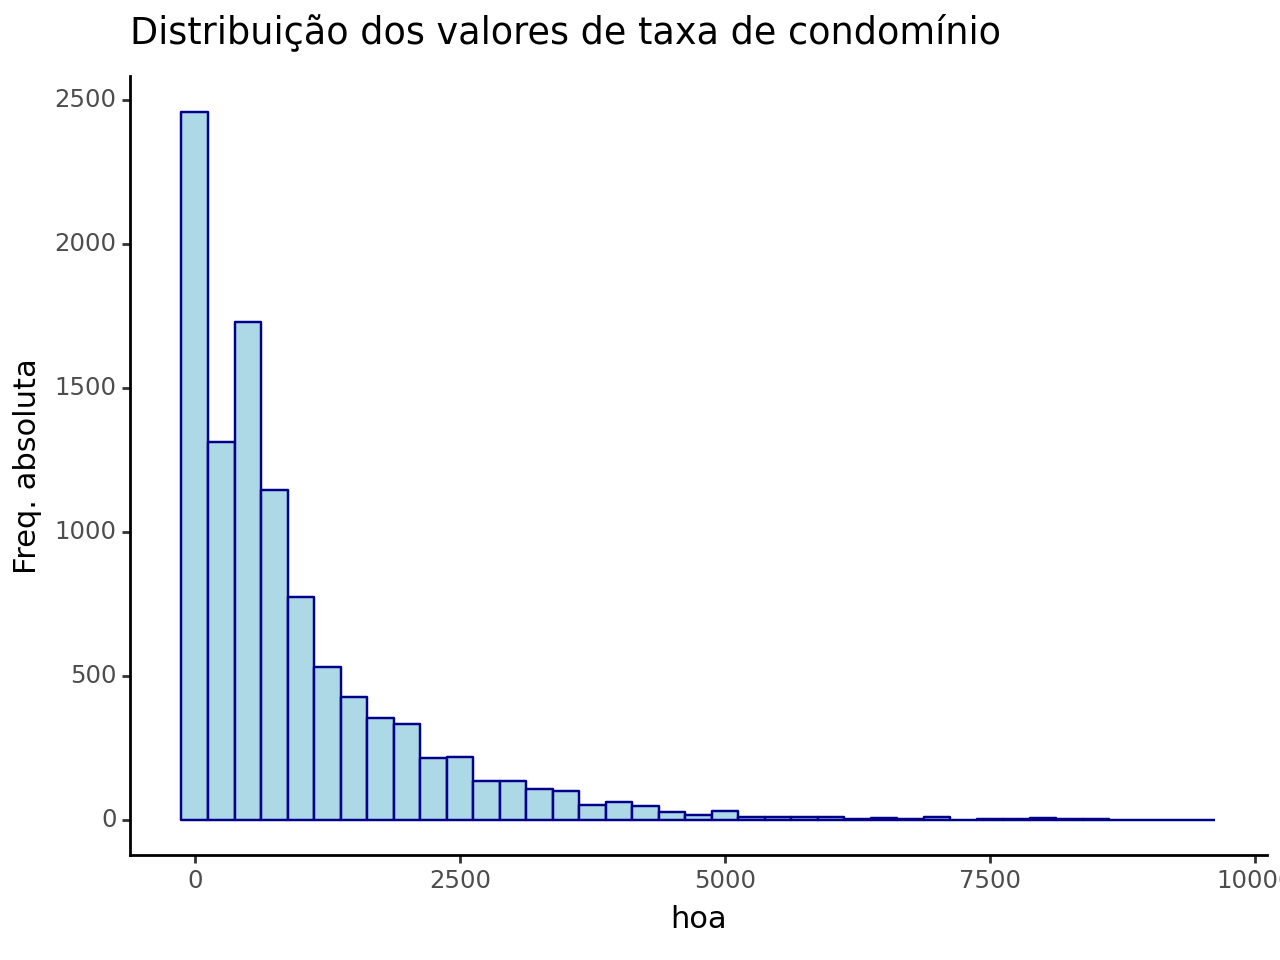

In [30]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='hoa'),
        binwidth=250,
        fill='lightblue',
        color='darkblue'
    )
    +labs(
        title='Distribuição dos valores de taxa de condomínio',
        y='Freq. absoluta'
    )
    +theme_classic()
)
print(g)

#### Verificando possíveis valores discrepantes da feature *floor*

Acima vimos que há um imóvel cujo andar é 301. Precisamos verificar.

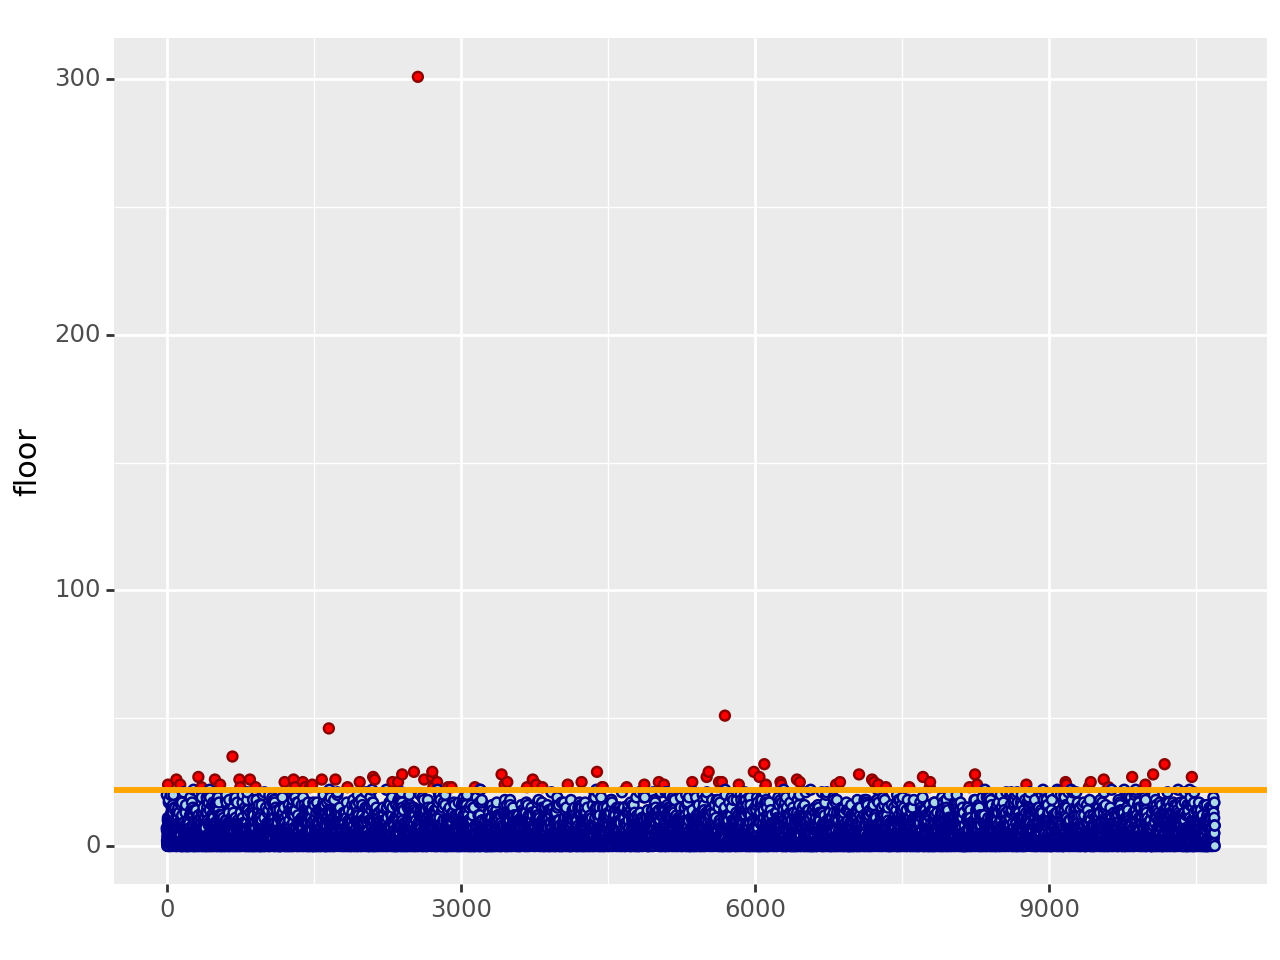

In [31]:
g=(
    ggplot(data=df)
    +geom_point(
        aes(x=df.index.values, 
            y='floor'),
        fill=['red' if c > np.quantile(df['floor'], .99) else 'lightblue' for c in df['floor']],
        color=['darkred' if c > np.quantile(df['floor'], .99) else 'darkblue' for c in df['floor']]
    )
    +geom_hline(
        yintercept=np.quantile(df['floor'], .99),
        color='orange',
        size=1.2
    )
    # +theme_classic()
)
print(g)

In [32]:
percentile_99_floor = np.quantile(df['floor'], .99)
df.query("floor >= @percentile_99_floor").sort_values('floor', ascending=False)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854
1654,São Paulo,353,4,5,5,46,acept,not furnished,3000,10000,0,127,13130
671,São Paulo,250,3,2,3,35,acept,furnished,2500,15000,1084,191,18780
6096,São Paulo,84,2,3,2,32,not acept,furnished,850,8500,450,108,9908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,São Paulo,40,1,1,0,22,acept,furnished,473,2300,39,30,2842
8346,São Paulo,260,4,4,6,22,acept,furnished,2480,5500,1167,70,9217
3200,São Paulo,186,3,3,2,22,not acept,not furnished,1350,5435,405,69,7259
3197,São Paulo,225,4,5,4,22,acept,furnished,2000,9000,1192,115,12310


Evidentemente o andar 301 indicado para o imóvel em Campinas está equivocado. Já o segundo registro, em Campinas, podemos afirmar que, de acordo com [Council on Tall Buildings and Urban Habitat](https://www.skyscrapercenter.com/explore-data?output=list&types%5B%5D=building&statuses%5B%5D=COM&height=&region_id=4&country_id=22&city_id=2152&min_year=&max_year=&filter_company=&output=list), que realiza auditorias de arranha-céus pelo mundo afora, está errado. O edifício com maior número de andares localizado em Campinas, possui 38 andares.

In [33]:
# Predio com andar mais alto por cidade
def get_tallest_floor(df):
    """Returns the tallest floor by city.
    """
    cities = df['city'].unique()
    return {city: df.loc[df['city'] == city]['floor'].max() for city in cities}

In [34]:
# Validando os andares de acordo com informacoes do Council on Tall Buildings and Urban Habitat
council_data= {
    'Belo Horizonte': 42,
    'Campinas': 38,
    'São Paulo': 52,
    'Rio de Janeiro': 48,
    'Porto Alegre': 32
}

def validate_tallest_floor(data:dict, info:dict) -> dict:
    """Checks if the data of floors by city is less than or equal to the database

    Args:
        data (dict): Tallest floor from the DataFrame
        info (dict): Database to be compared with.
    
    Returns:
        dict
    """
    return {k:True if data[k] <= info[k] else False for k in data.keys()}        
    

In [35]:
validated_data = validate_tallest_floor(get_tallest_floor(df), council_data)
validated_data

{'São Paulo': True,
 'Porto Alegre': True,
 'Rio de Janeiro': True,
 'Campinas': False,
 'Belo Horizonte': False}

In [36]:
# Encontrar os registros para removê-los

campinas_condition= "city == 'Campinas' and floor > @council_data['Campinas']"
bh_condition= "city == 'Belo Horizonte' and floor > @council_data['Belo Horizonte']"

conditions = [campinas_condition, bh_condition]

def drop_by_indexes(df:pd.DataFrame, conditions:list|np.ndarray):
    """
    """
    for condition in conditions:
        indexes = df.query(condition).index.values
        df = df.loc[~df.index.isin(indexes)]
    
    return df

In [37]:
df = drop_by_indexes(df,conditions)

#### Explorando os valores de IPTU: R$ 313.700

De acordo com o site [serasa](https://www.serasa.com.br/blog/iptu-o-que-e-quem-tem-que-pagar/), existem alguns fatores que influenciam o valor do IPTU a ser pago. Esse imposto é calculado com base no valor venal do imóvel.

<cite>Alguns fatores influenciam o valor venal do imóvel, como: 
- o tamanho do terreno;
- a localização;
- a área construída e;
- o tipo de acabamento.

A base de cálculo usa essas informações para depois multiplicar o valor venal pela alíquota que cada município estabelece para o IPTU.<cite/>

Existem legislações específicas que isentam o pagamento de IPTU. Essas legislações são de competência dos municípios.

Veja exemplos [aqui.](https://economia.uol.com.br/noticias/redacao/2023/02/08/iptu-entenda-quando-imoveis-sao-isentos-da-cobranca-de-imposto-em-sp-e-rj.htm#:~:text=Em%20S%C3%A3o%20Paulo%2C%20s%C3%A3o%20isentos%20de%20IPTU%20os%20seguintes%20im%C3%B3veis%3A&text=Que%20sirvam%20como%20resid%C3%AAncia%2C%20de,%C3%A0%20Uni%C3%A3o%20para%20fins%20educacionais.)

In [38]:
df[df['property_tax'] > 1.5*scipy.stats.iqr(df['property_tax'])].sort_values('property_tax', ascending=False)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880,151,32040
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500,159,27760
5331,São Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830,26,16350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921,Campinas,326,3,3,4,0,acept,not furnished,870,4200,523,64,5657
2435,São Paulo,108,2,4,2,7,acept,not furnished,1289,4500,522,58,6369
1415,Belo Horizonte,150,4,4,4,12,acept,not furnished,890,4200,522,56,5668
5255,Belo Horizonte,373,4,5,7,0,acept,not furnished,0,11500,522,189,12210


Conforme vemos acima, temos dois pontos importantes a serem trabalhados:

1. O primeiro registro deve ser excluído. Não faz sentido um imóvel de 42 $m^2$ ter um IPTU de R$ 313.700
2. Alguns dos demais registros nos levantam a suspeita de que sejam valores anuais em vez de mensais. Mas, a partir de qual valor devemos considerar que se trata de um valor anual e não mensal?

Para tentar responder a questão 2:

- Classificaremos os imóveis de acordo com o tamanho da área;
- Verificamos o valor mediano de IPTU de cada grupo e multiplicaremos por 12 para anualizar. Chamaremos de *mediana anualizada*;
- Existem, eventualmente, valores iguais ou superiores à mediana anualizada. Faria sentido dividi-los por 12. Porém, exsitem valores que se aproximam da mediana anualizada, mas ainda são inferiores. Nesse caso, não são alterados.

In [39]:
# Excluindo o registro de IPTU R$ 313.700
df = df[~df.index.isin([6645])]

In [40]:
df.groupby(['city'])['area'].agg(['min', 'max'])

,min,max
city,,
Belo Horizonte,15,2000
Campinas,20,999
Porto Alegre,18,981
Rio de Janeiro,15,950
São Paulo,11,1600


In [41]:
def create_area_category(series:pd.Series) -> str:
    """Return respective category depending on the area
    Args:
        series (pd.Series): Pandas Series with area values
    Returns:
        pd.Series
    """
    
    if series <= 50:
        return "ate 50"
    elif series >= 51 and series <= 100:
        return "51 a 100"
    elif series >= 101 and series <= 150:
        return "101 a 150"
    elif series >= 151 and series <= 200:
        return "151 a 200"
    elif series >= 201 and series <= 250:
        return "201 a 250"
    elif series >= 251 and series <= 300:
        return "251 a 300"
    elif series >= 301 and series <= 350:
        return "301 a 350"
    elif series >= 351 and series <= 400:
        return "351 a 400"
    elif series >= 401 and series <= 450:
        return "401 a 450"
    elif series >= 451 and series <= 500:
        return "451 a 500"
    else:
        return ">500"

In [42]:
df = df.assign(area_category=lambda x: x['area'].apply(create_area_category))

In [43]:
df.groupby(['city', 'area_category'])['property_tax'].agg(['min','mean', 'median', 'max'])

min         mean  median    max
city           area_category                                 
Belo Horizonte 101 a 150        0   232.493827   193.5   1500
               151 a 200        0   328.978571   259.0   1058
               201 a 250        0   502.460526   324.0   1900
               251 a 300        0   575.409639   379.0  12500
               301 a 350        0   582.959184   417.0   2241
               351 a 400        0   474.666667   404.0   1975
               401 a 450        0   502.434783   466.0   2192
               451 a 500        0   533.888889   460.0   1297
               51 a 100         0   107.854722    85.0   1680
               >500             1   907.979167   820.5   3000
               ate 50           0    58.456376    39.0    334
Campinas       101 a 150        0   163.137255   135.5   1056
               151 a 200        0   213.769231   200.5    600
               201 a 250        0   336.305556   327.0    715
               251 a 300        0   372.387097   366.0   1167
               301 a 350       55   409.736842   407.0    673
               351 a 400      269   565.222222   534.0    888
               401 a 450      230   513.800000   445.5    880
               451 a 500       82   685.500000   674.0   1080
               51 a 100         0    74.876011    64.0   1500
               >500           200   833.052632   817.0   1898
               ate 50           0    34.524390    20.5    277
Porto Alegre   101 a 150        0   192.584507   142.0   2500
               151 a 200        0   220.824561   175.0   1300
               201 a 250        0   364.972222   317.5   2360
               251 a 300        0   219.115385   206.5    500
               301 a 350       34   573.375000   367.0   2900
               351 a 400        0   400.187500   315.0   1100
               401 a 450       84   303.363636   197.0    959
               451 a 500       38   581.333333   381.5   1250
               51 a 100         0    74.872763    54.0   2610
               >500             0   853.500000   521.0   4500
               ate 50           0    38.912500    25.0    658
Rio de Janeiro 101 a 150        0   292.151020   250.0   2731
               151 a 200        0   483.035088   383.0   5404
               201 a 250        0   549.617647   500.0   1839
               251 a 300       14   836.666667   750.0   3334
               301 a 350      190   674.666667   682.0   1084
               351 a 400        6   926.727273   750.0   2500
               401 a 450      417   917.900000   829.5   1649
               451 a 500       54   795.000000   486.0   1650
               51 a 100         0   194.841244   109.0  28120
               >500           334  1384.769231  1250.0   4241
               ate 50           0    59.710366    49.5    593
São Paulo      101 a 150        0   302.800738   265.0   4000
               151 a 200        0   507.211111   459.0   4710
               201 a 250        0   747.131373   717.0   5000
               251 a 300        0   894.756374   800.0  10830
               301 a 350        0  1100.014851   996.0   3461
               351 a 400        0  1266.818653  1142.0   4830
               401 a 450        0  1311.044776  1250.0   3700
               451 a 500        0  1568.038961  1230.0   5500
               51 a 100         0   125.618215    84.0   3000
               >500             0  2610.782609  2106.0  21880
               ate 50           0    62.939962    34.0   4247

In [44]:
df=df.assign(monthly_property_tax=np.where(df['property_tax'] >= df.groupby(['city', 'area_category'])['property_tax'].transform(lambda x: np.median(x)*12), df['property_tax']/12, df['property_tax']),
            area_category_property_tax_median=df.groupby(['city', 'area_category'])['property_tax'].transform(lambda x: np.median(x)))

In [45]:
df = df[['city', 'area', 'area_category', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax', 'area_category_property_tax_median', 'monthly_property_tax','fire_insurance', 'total']].copy()


ANÁLISE DESCRITIVA DOS DADOS:

Com base nos dados fornecidos, podemos fazer uma análise descritiva das principais estatísticas das variáveis apresentadas: area, rooms, bathroom, parking spaces, hoa (R$), rent amount (R$), property tax (R$), fire insurance (R$) e total (R$):


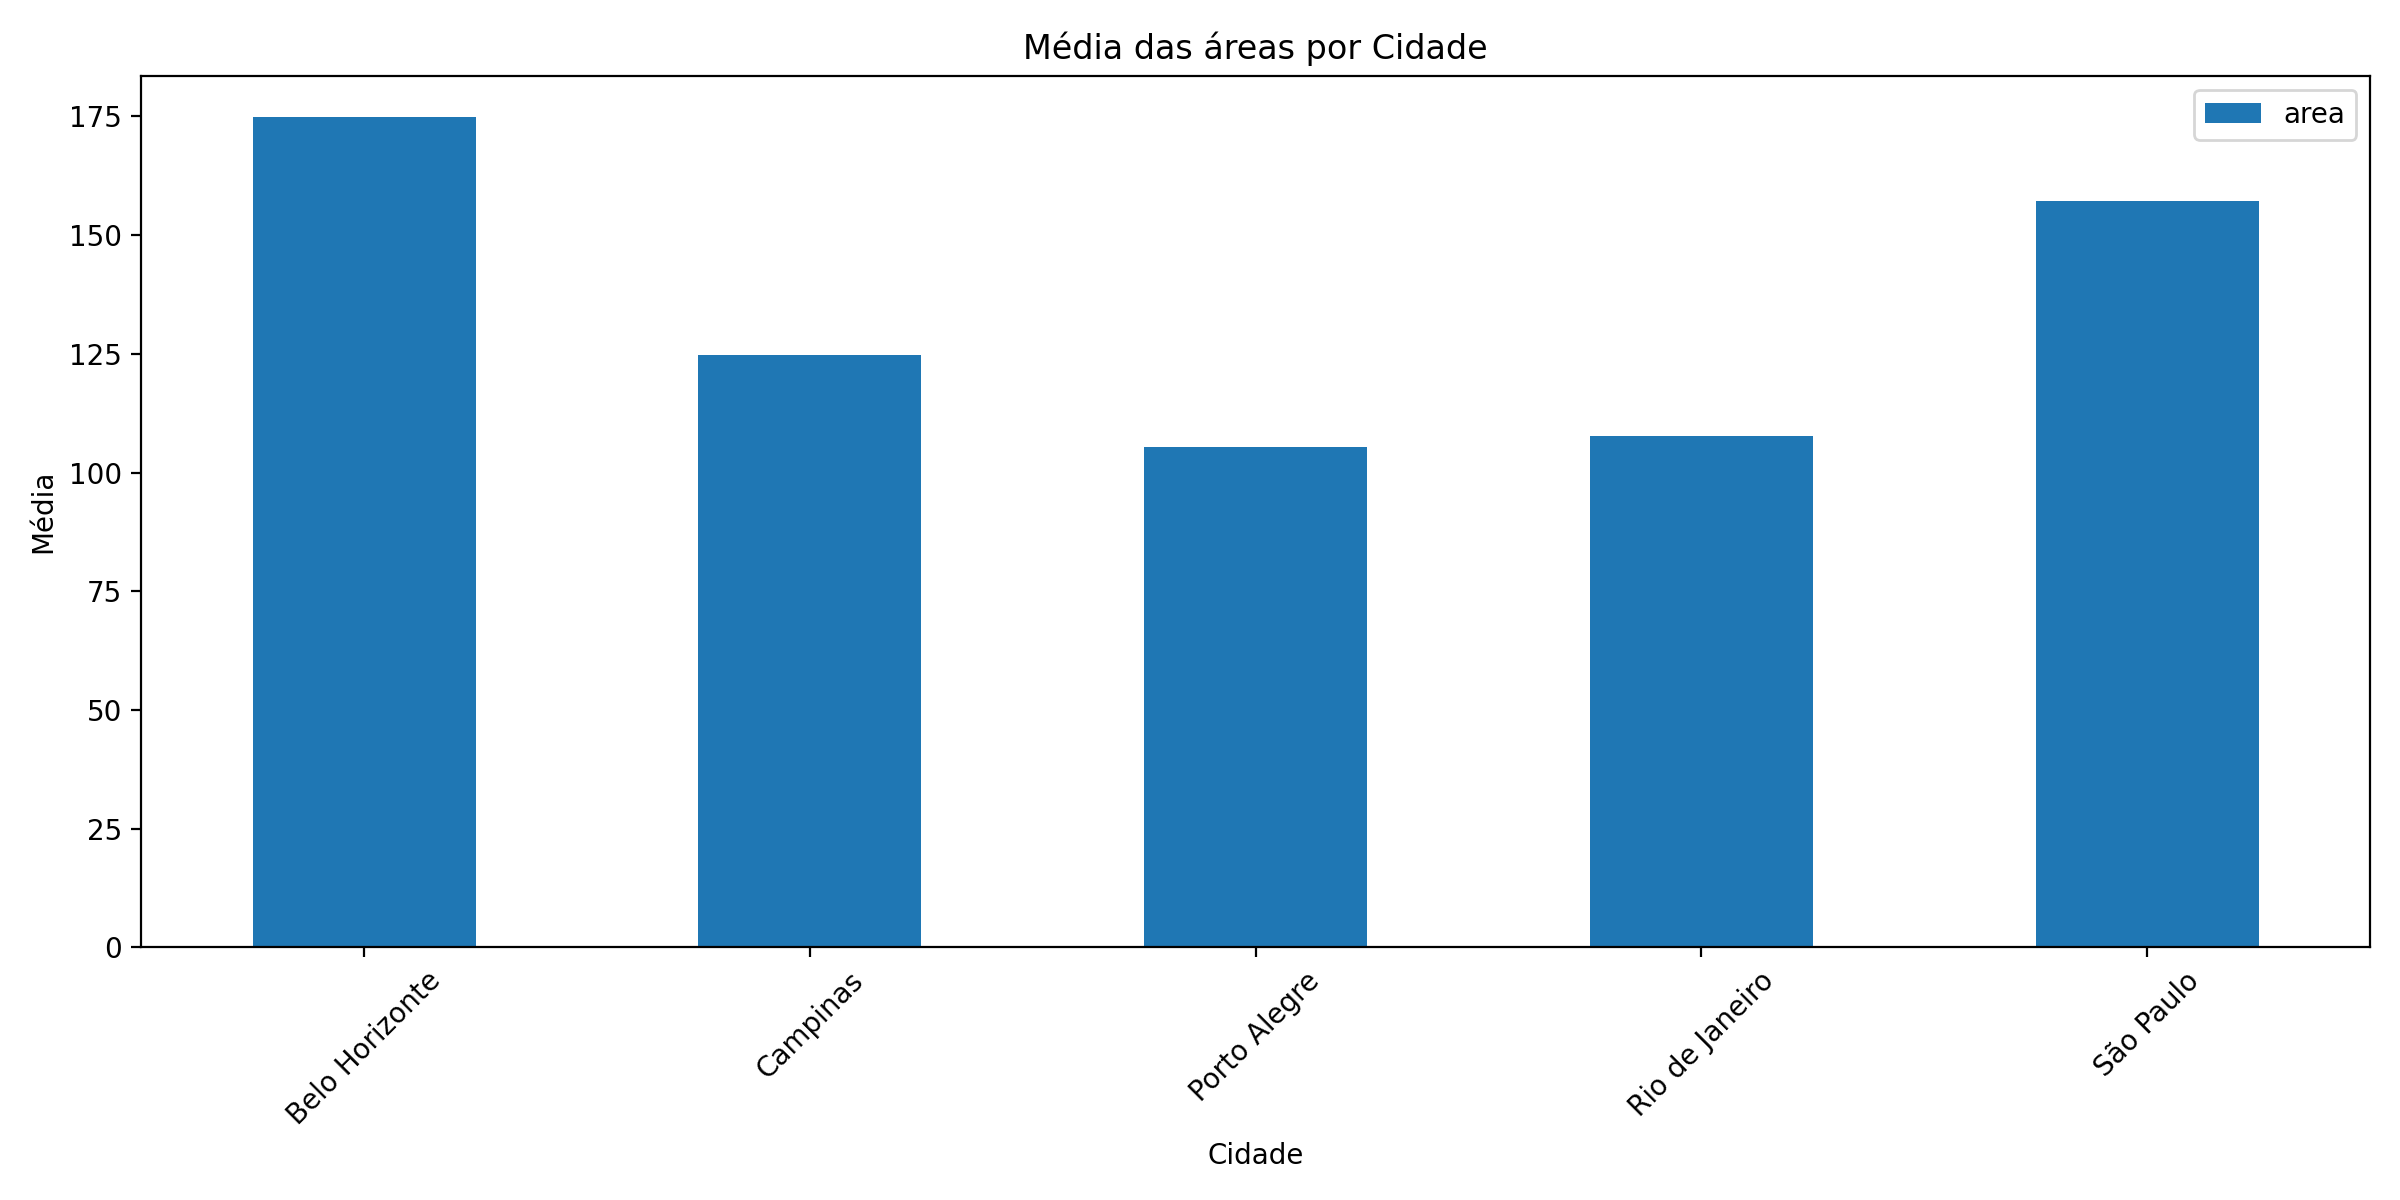

In [53]:

colunas_numericas = ['area']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Média das áreas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Como é possível observar, a cidade de Belo Horizonte é que a possui os maiores imóveis em média, sendo seguida por São Paulo. Na sequência, o desvio padrão entre as demais cidades aumenta, sinalizando uma redução média na metragem dos apartamentos considerável.

           Cidade  Custo por m²
0  Belo Horizonte     26.521511
1        Campinas     25.781747
2    Porto Alegre     28.291834
3  Rio de Janeiro     43.557266
4       São Paulo     40.268075


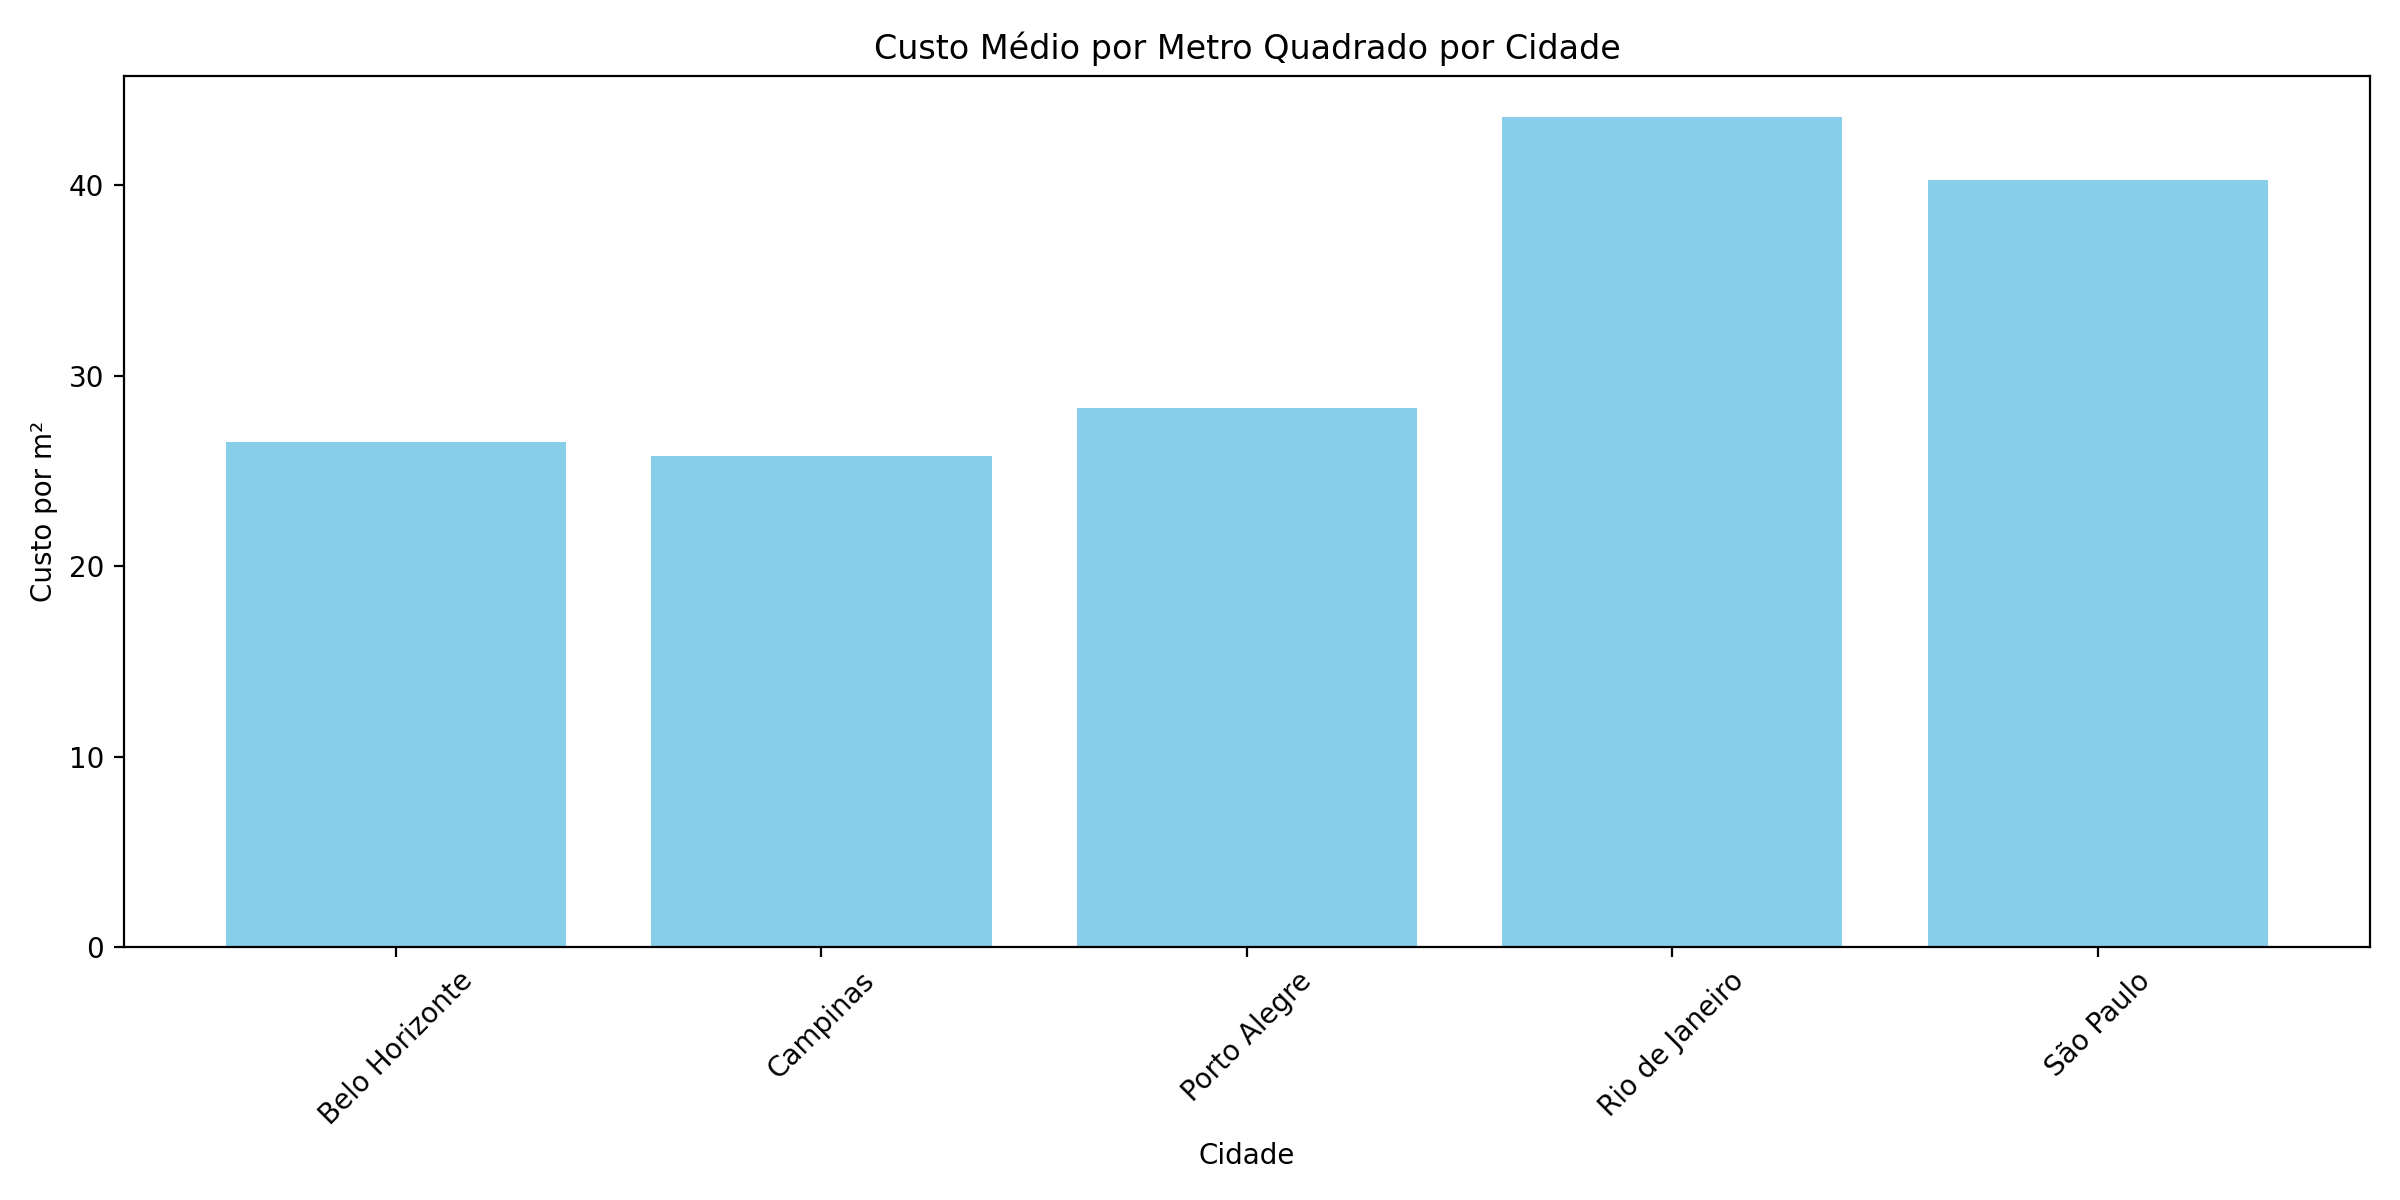

In [69]:

custo_por_metro_quadrado = df.groupby('city')['total'].mean() / df.groupby('city')['area'].mean()

custo_por_metro_quadrado_df = pd.DataFrame({'Cidade': custo_por_metro_quadrado.index, 'Custo por m²': custo_por_metro_quadrado.values})

print(custo_por_metro_quadrado_df)

plt.figure(figsize=(12, 6))
plt.bar(custo_por_metro_quadrado_df['Cidade'], custo_por_metro_quadrado_df['Custo por m²'], color='skyblue')
plt.title('Custo Médio por Metro Quadrado por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Custo por m²')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

Analisando as médias de área dos apartamentos e dos custos totais de locação, observamos que o Rio de Janeiro possui o metro quadrado mais caro entre as área pesquisadas. Essa dado é seguido pela cidade de São Paulo, Porto Alegre, Belo Horizonte e por fim, Campinas.

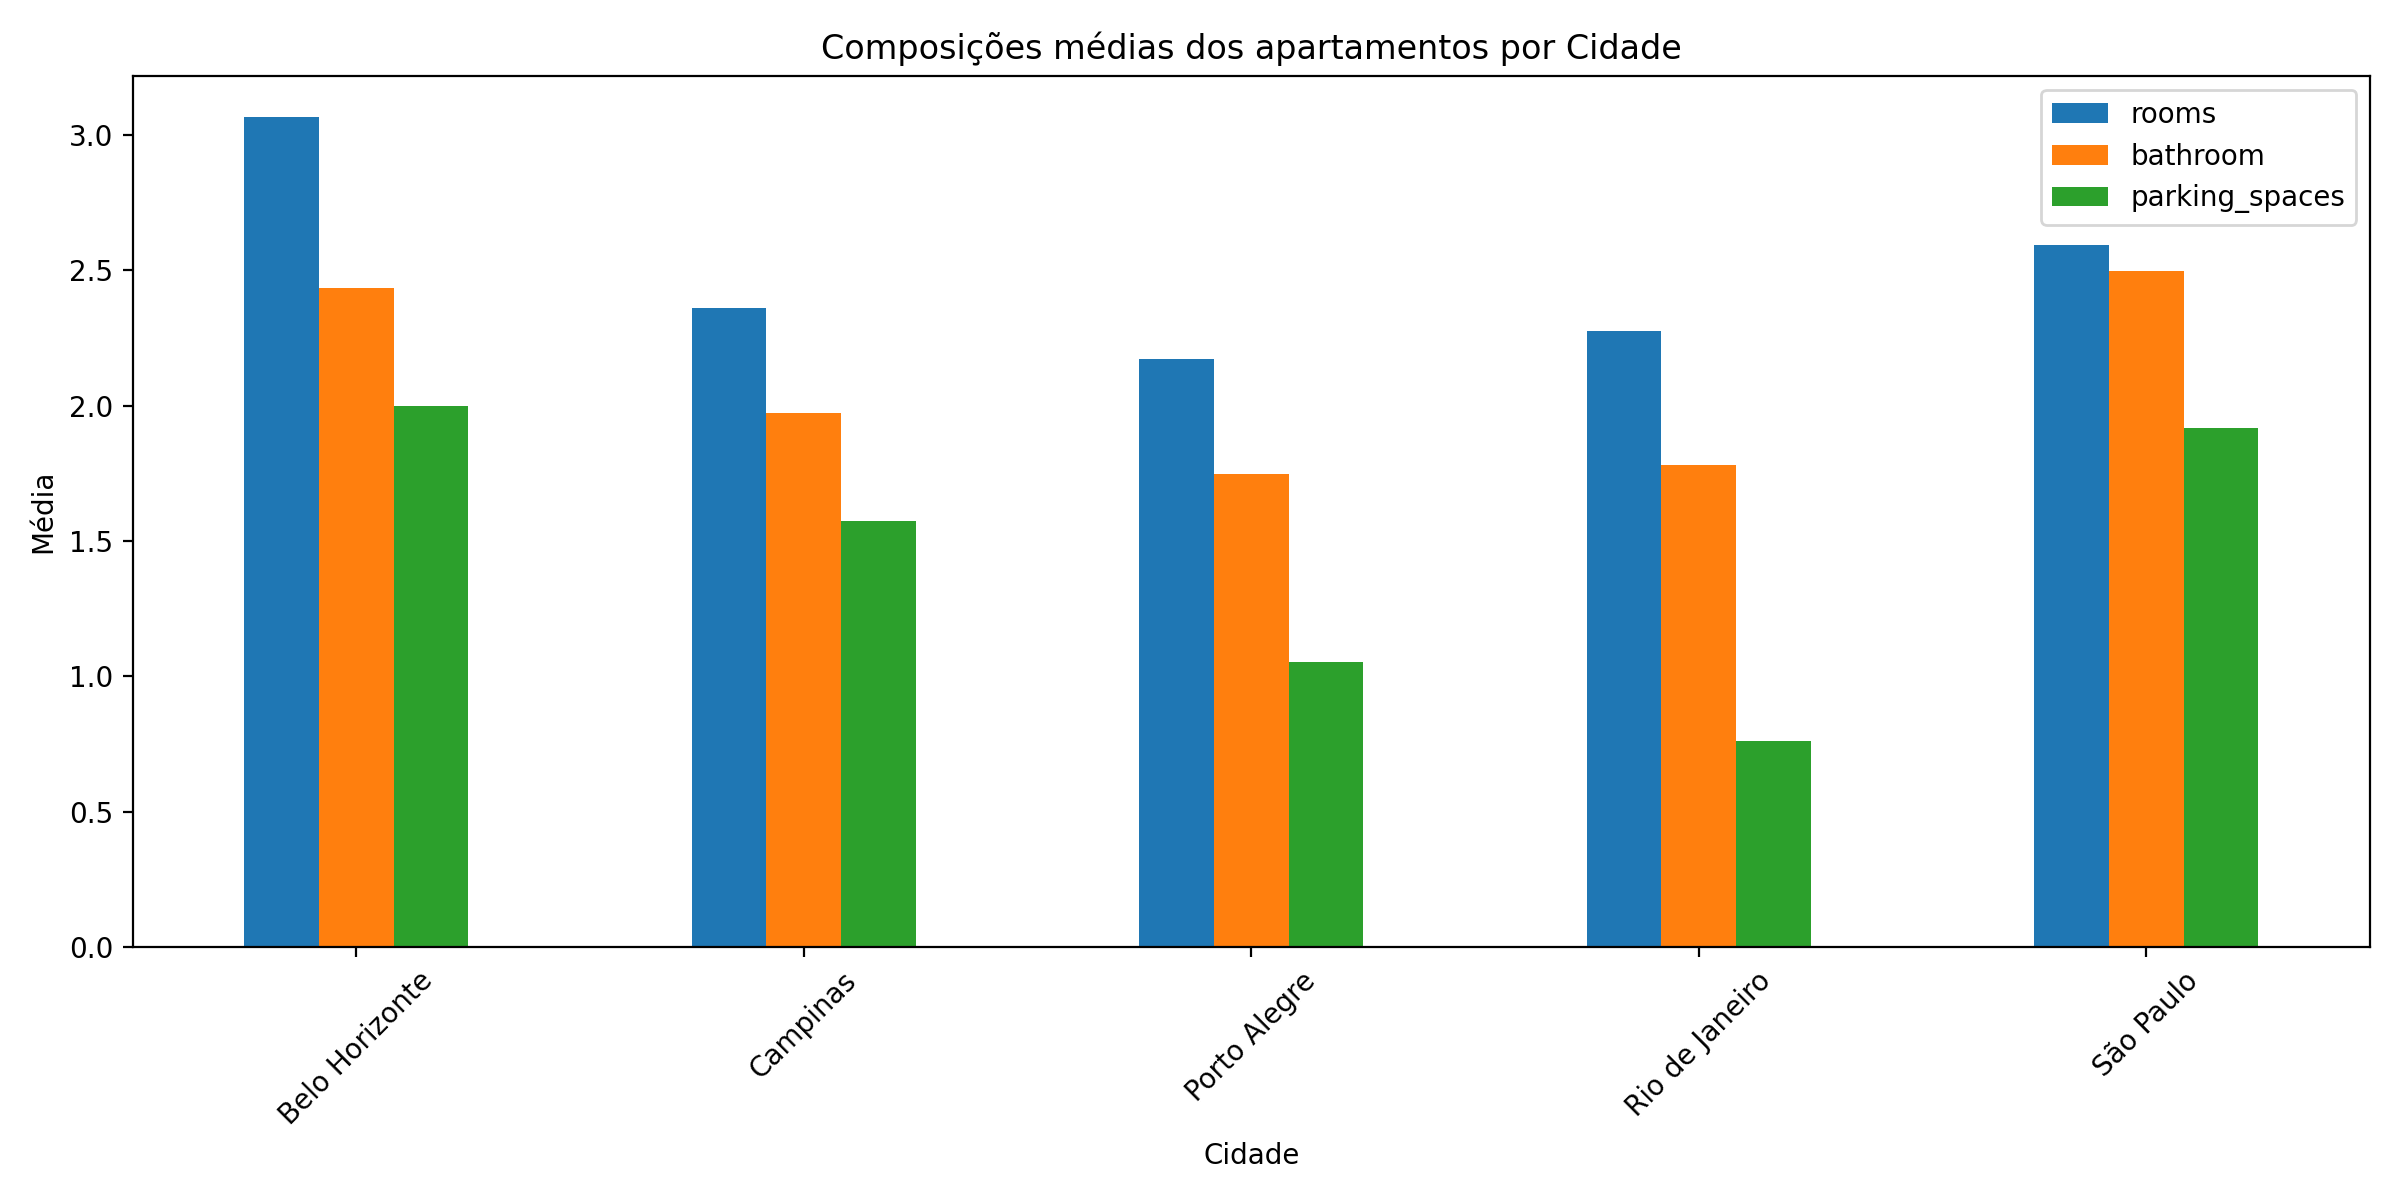

In [55]:
colunas_numericas = ['rooms', 'bathroom', 'parking_spaces']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Composições médias dos apartamentos por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45) 
plt.tight_layout()


plt.show()

Quando analisamos a composição desses apartamentos, com base nos cômodos presentes no dataframe, observamos que o padrão se mantém apenas para a quantidade de quartos na cidade de Belo Horizonte. A média maior em São Paulo de banheiros e vagas de estacionamentos indicam que, em média, mesmo em apartamentos menores esses cômodos estão presentes em quantidades maiores em média do que em Belo Horizonte.

Por fim, o número de vagas de estacionamento do Rio de Janeiro é expressivamente menor que nas outras cidades.

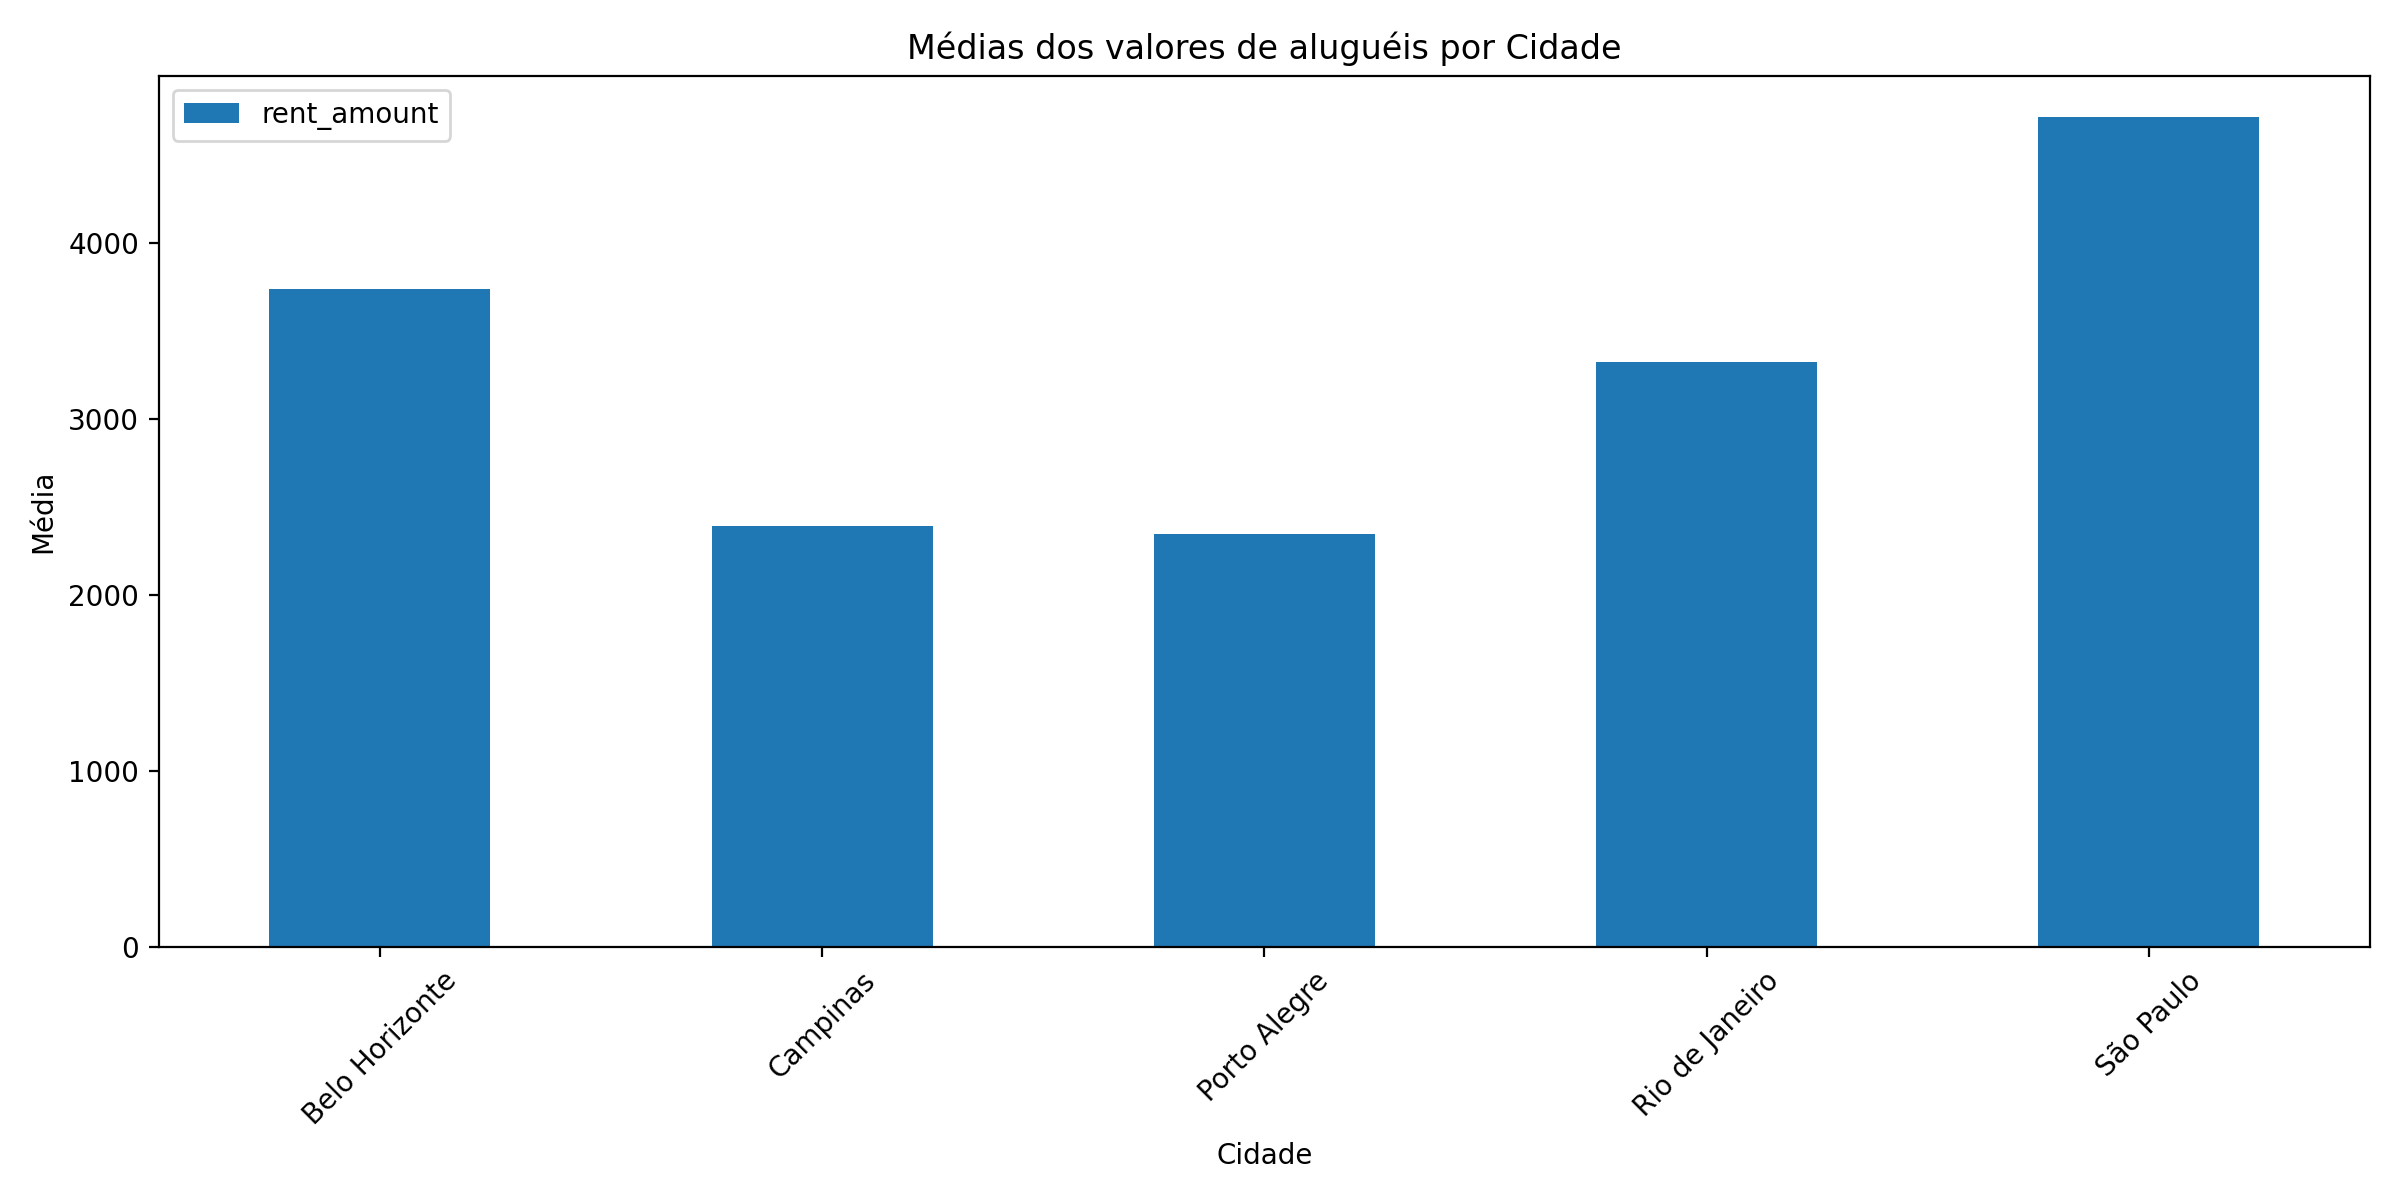

In [57]:
colunas_numericas = ['rent_amount']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Médias dos valores de aluguéis por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45) 
plt.tight_layout()


plt.show()

Quando olhamos para a média dos preços de aluguéis, São Paulo possui a média de akuguel mais caro, mesmo não sendo os maiores em área. A capital é seguida por Belo Horizonte e Rio de Janeiro, por fim, Campinas e Porto Alegre demonstram de custos de aluguéis bem semelhantes em média.

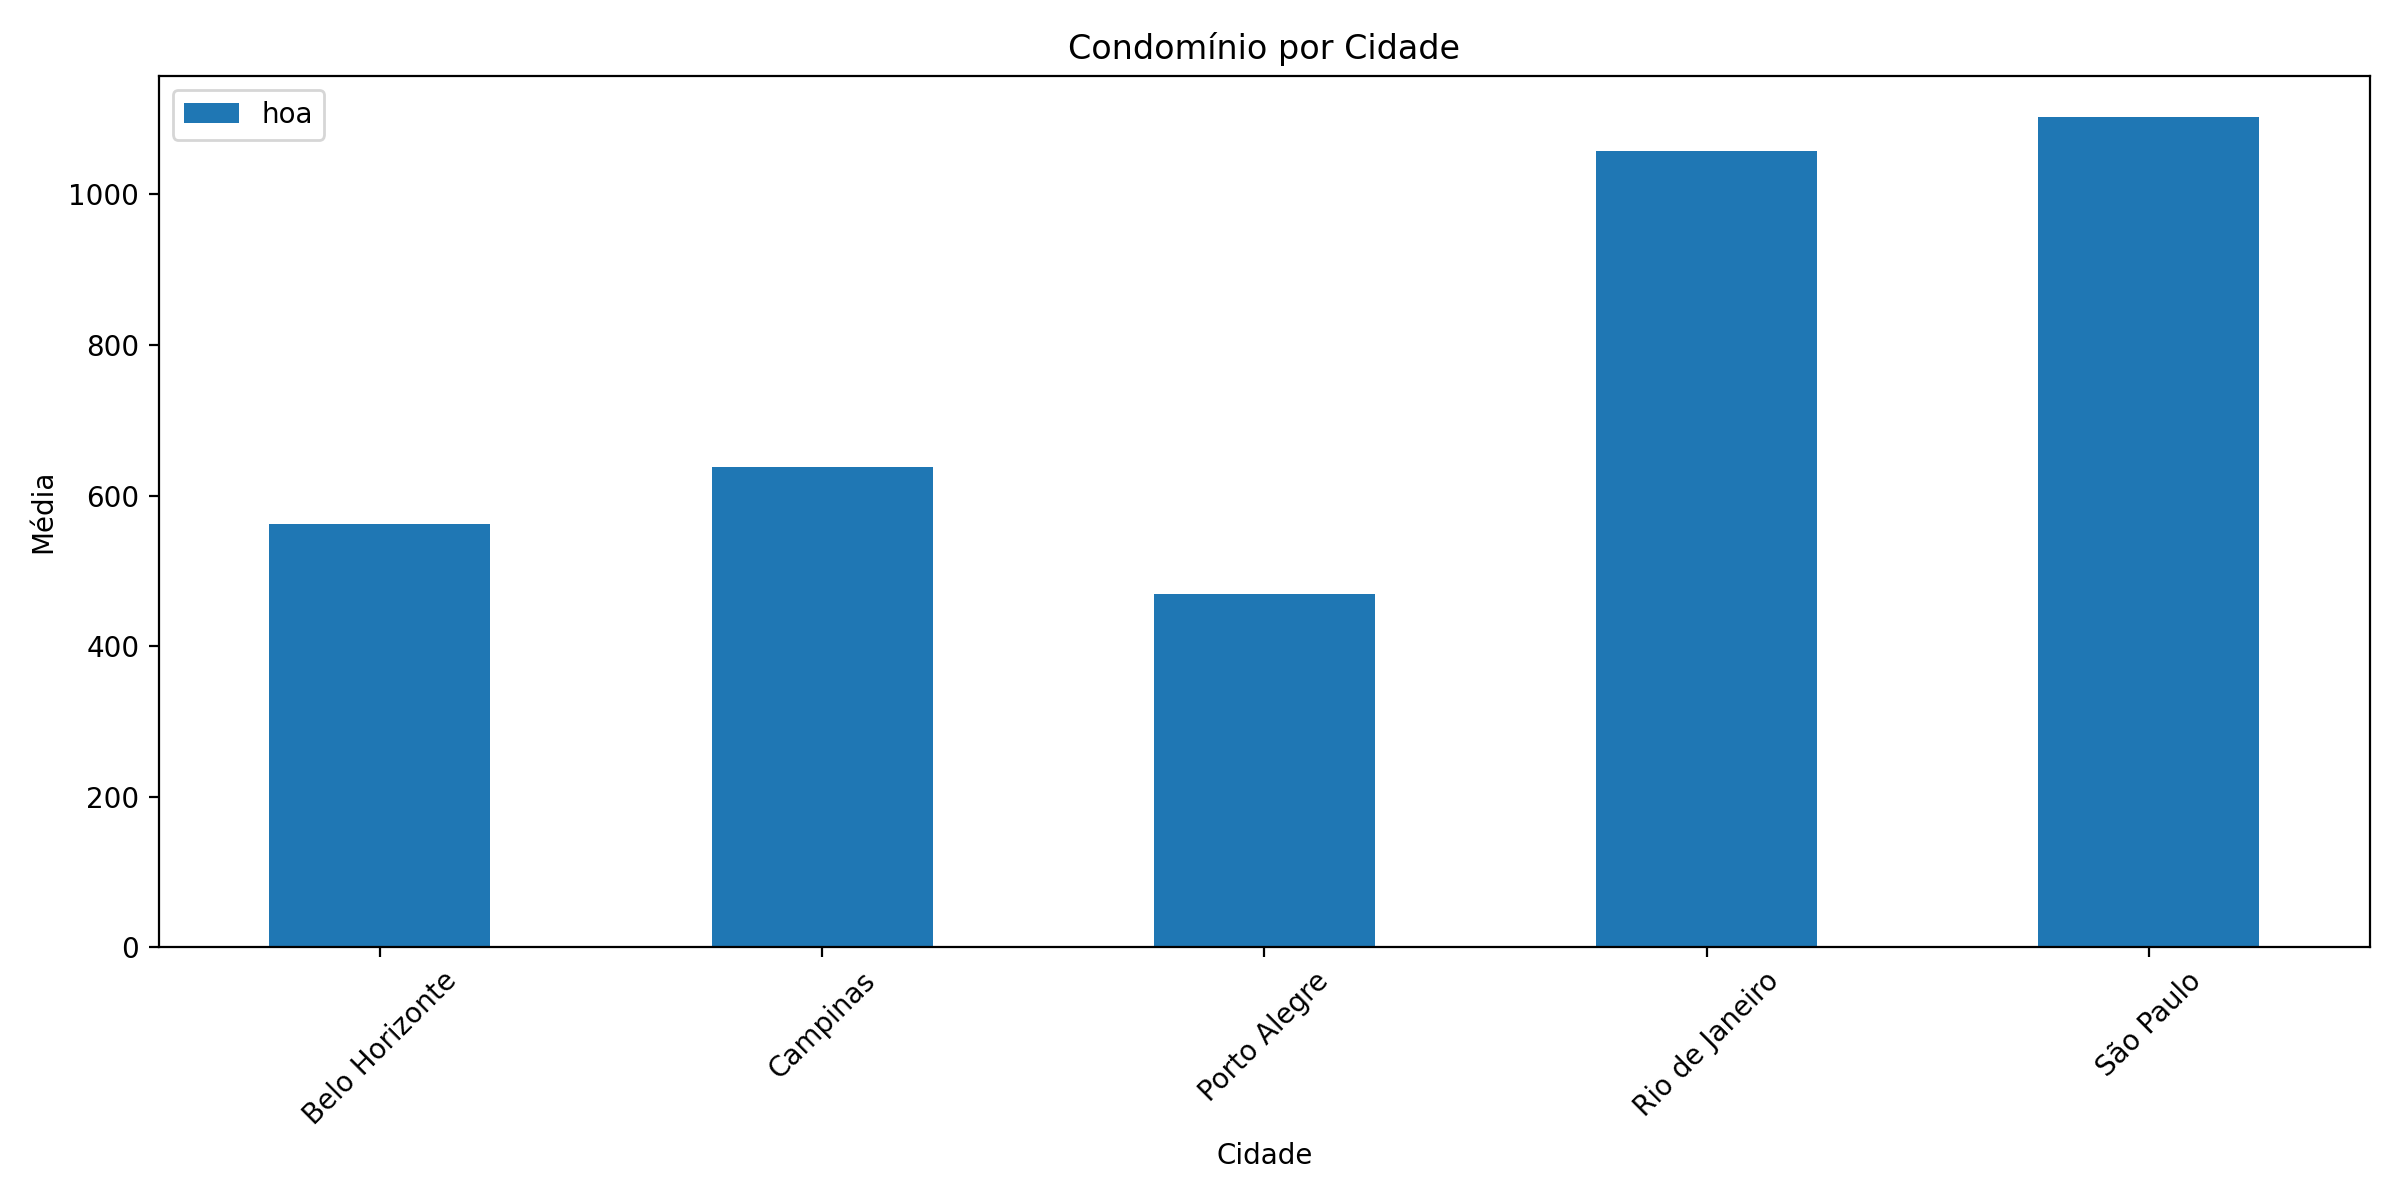

In [60]:
colunas_numericas = ['hoa']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Condomínio por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45) 
plt.tight_layout()


plt.show()

Quando analisamos os valores de condomínios, é possível observar que São Paulo e Rio de Janeiro possuem os valores mais altos de taxa condominial, em contrario sensu, Belo Horizonte possui um dos menores custos de condomínios das cidades pesquisadas, mesmo tendo os maiores apartamentos em média. Por fim, nesse cenário, Campinas possui um desvio padrão maior em relação a Porto Alegre.

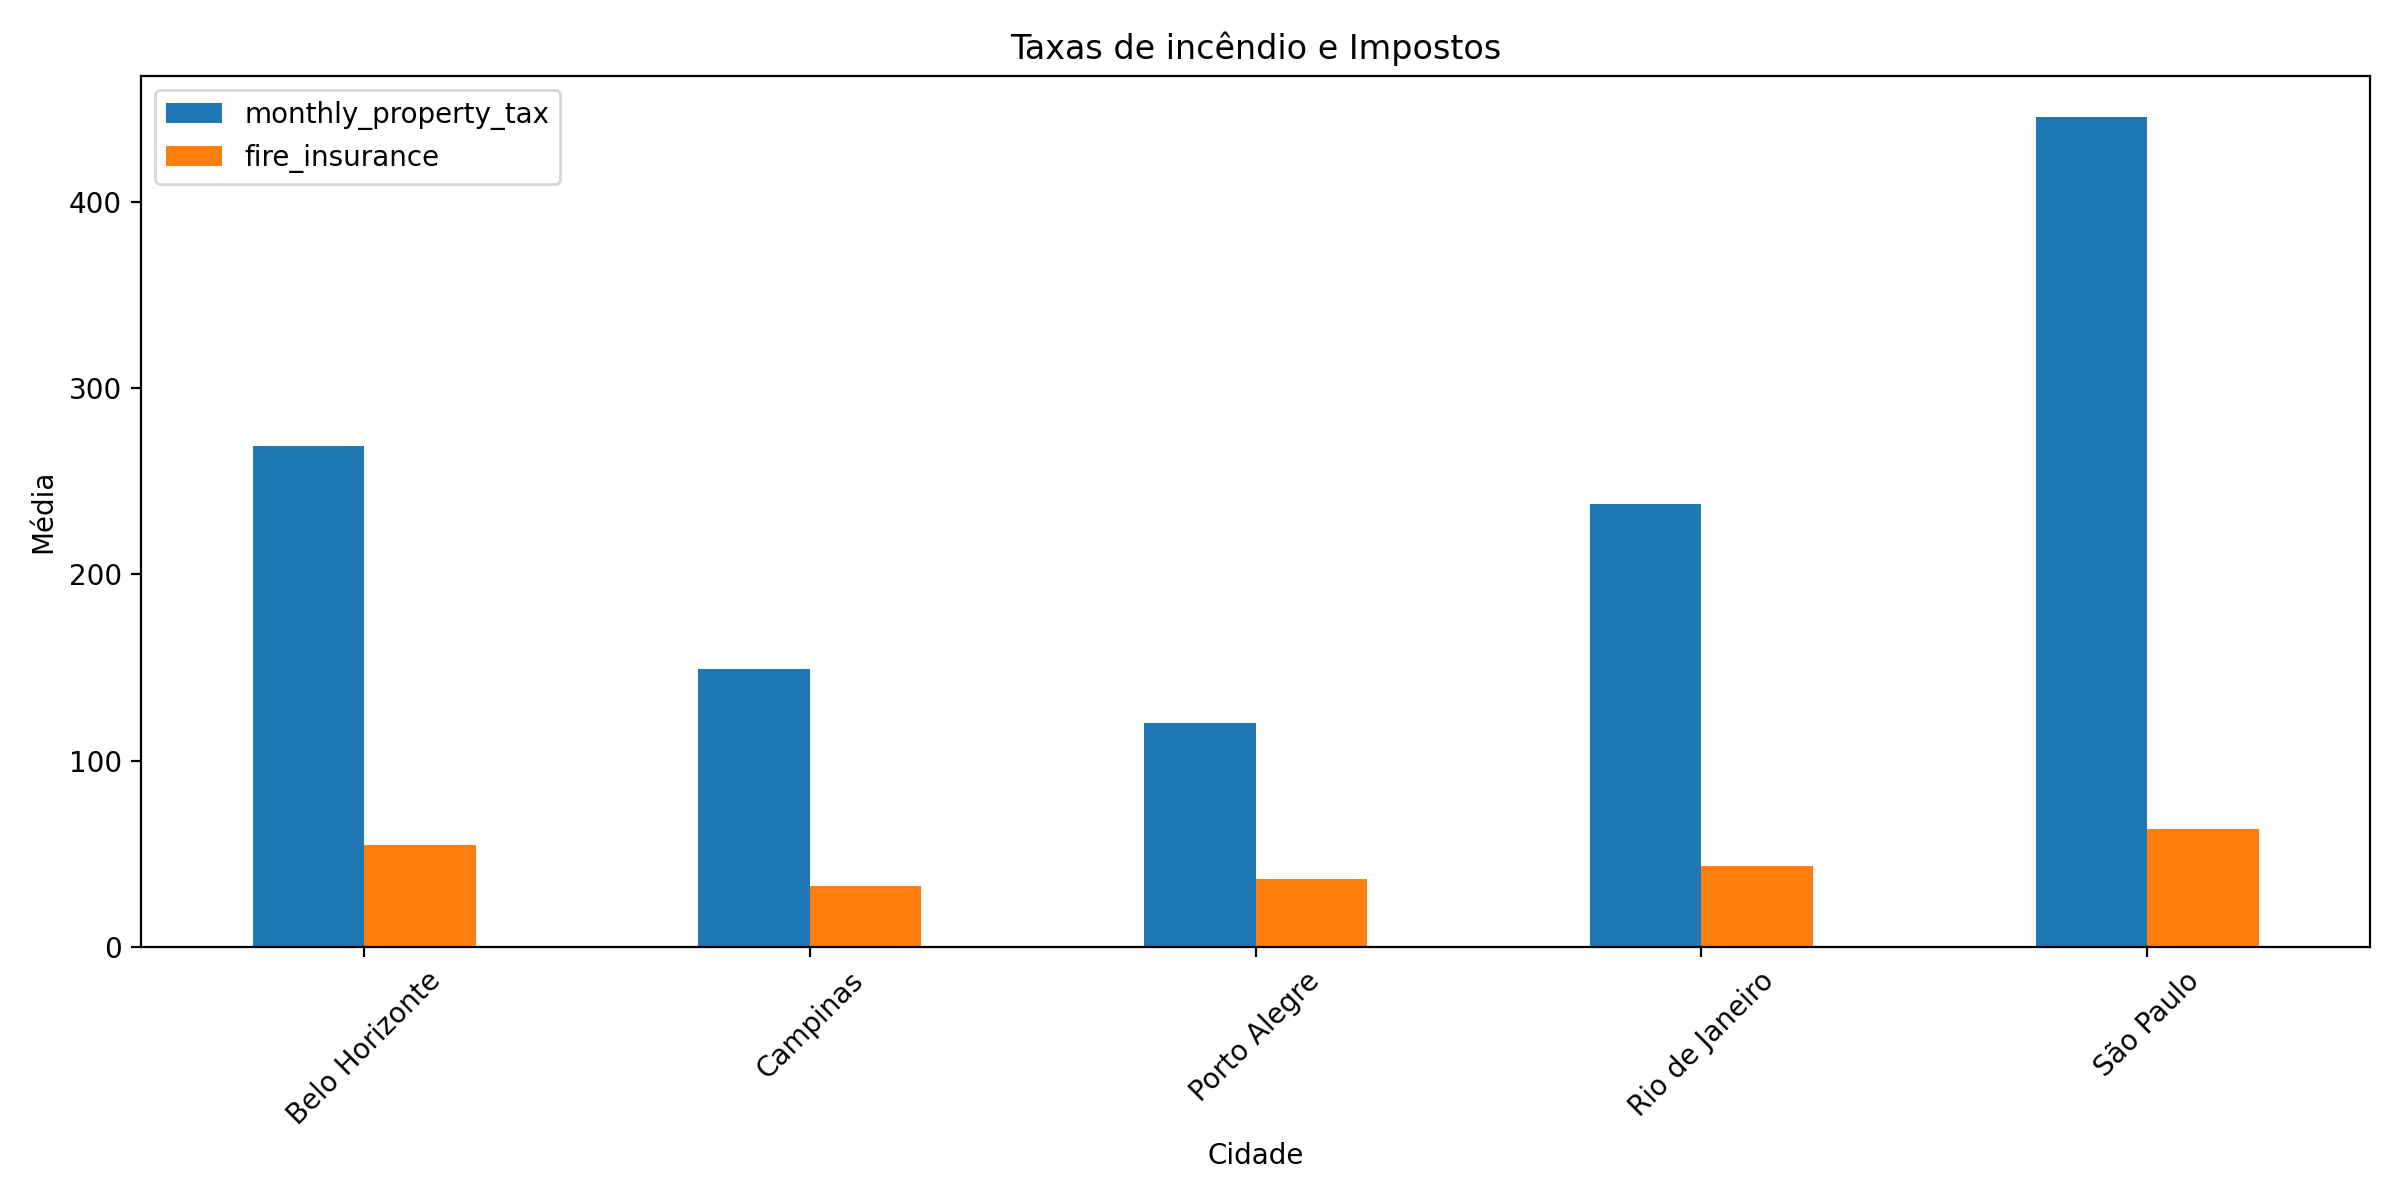

In [62]:
colunas_numericas = [ 'monthly_property_tax', 'fire_insurance']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Taxas de incêndio e Impostos')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45) 
plt.tight_layout()


plt.show()

Quando analisamos as demais taxas presentes no data frame, quais sejam, incêndio e impostos, observamos que São Paulo lidera as maiores taxas, seguido por Belo Horizonte e Rio de Janeiro.

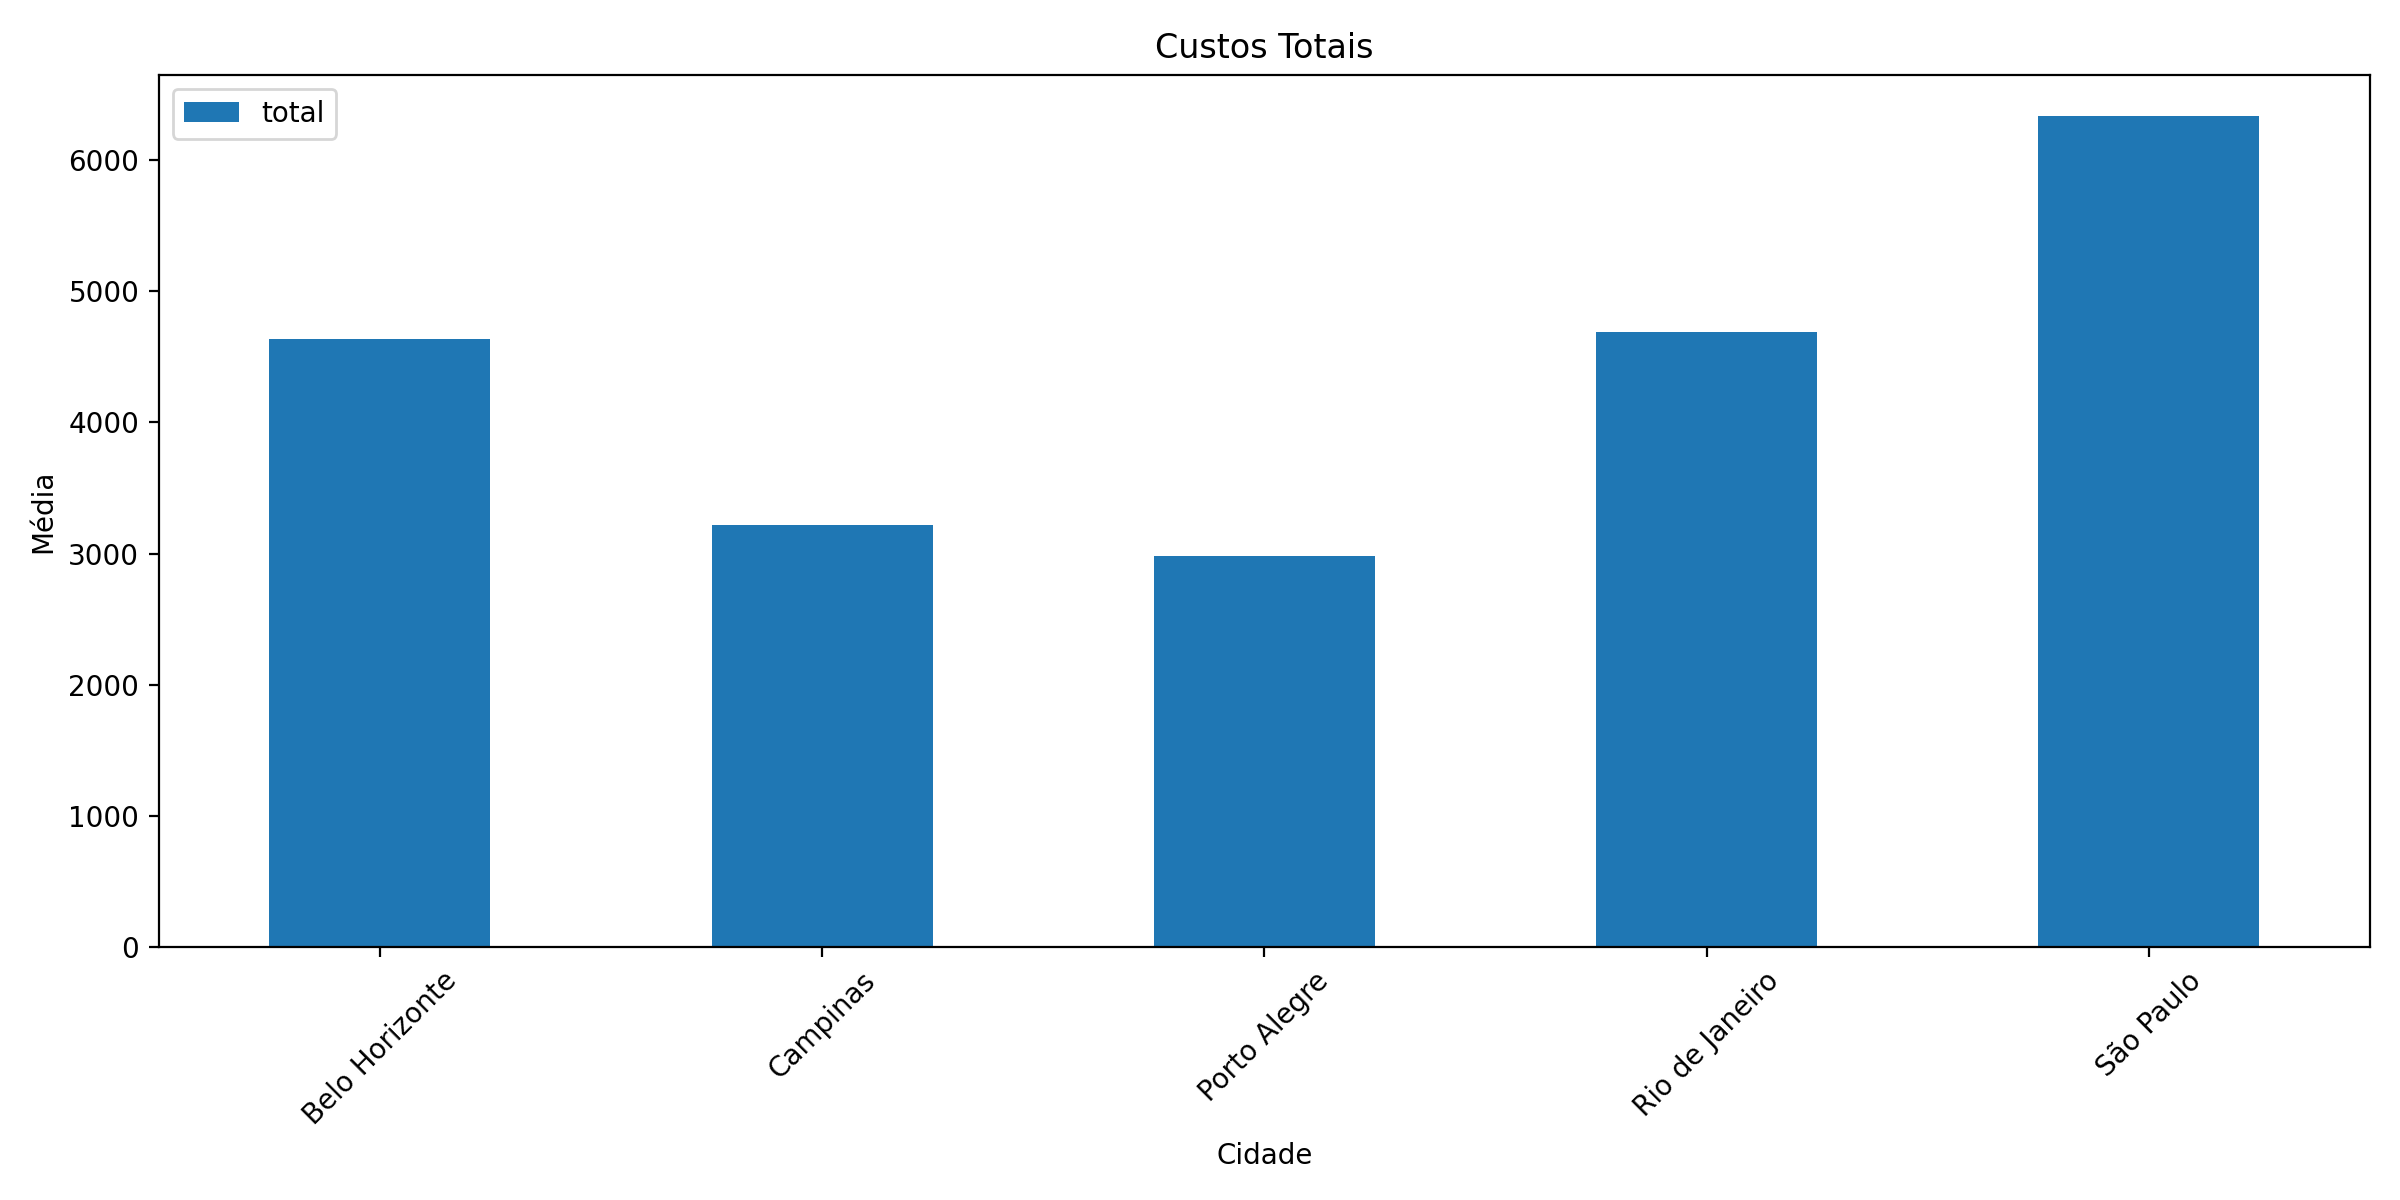

In [65]:
colunas_numericas = ['total']

media_por_cidade = df.groupby('city')[colunas_numericas].mean()

media_por_cidade.plot(kind='bar', figsize=(12, 6))
plt.title('Custos Totais')
plt.xlabel('Cidade')
plt.ylabel('Média')
plt.xticks(rotation=45) 
plt.tight_layout()


plt.show()

Por fim, quando analisamos esses dados financeiros de forma consolidada, ou seja, valores de aluguel, taxa de incêncio, condomìnio e impostos somados, observamos que São Paulo possui o maior custo médio para locação de todas as cidades pesquisadas, mesmo não possuindo os maiores apartamentos em área média, posição que é de Belo Horizonte. Importante observar também que o apesar do Rio de Janeiro não ter o maior custo de locação, ele ainda assim possui o metro quadrado mais caro entre as cidades analisadas.

 Por fim, é importante observar que os custos para se locar uma apartamento em Campinas ou Porto Alegre é bastante semelhante.